# Input Parameters

In [1]:
#source ISvenv/bin/activate (launching and exiting the virtual environment containing the required modules, stored in the working directory)
#ISvenv/bin/python your_script.py - for running a script in the virtual environment
#source deactivate - to deactivate the virtual environment

#import all the libraries needed
from import_dep import *

# import the class that imports the IS data
from IS_Import import ISdata, ImpedanceData, AgilentIS, SolatronIS
from IS_Functions import IS_plot, IS_plot_fit, run_to_dict, update_plot_string, add_slide, extract_single_dc
from IS_Fitting import *


# import custom plot style and colorbar functions
from plot_style import set_plot_style

# Define the path to the root directory containing the IS Data 
root_IS_Agilent = '/Users/horatiocox/Desktop/RUG_postdoc/UCL PostDoc/Experiments/Groningen'
root_IS_solatron = '/Users/horatiocox/Desktop/RUG_postdoc/UCL PostDoc/Experiments/Solatron/Combined_Analysis'

# Define the path to the output directory to save the data
output_IS_solatron = '/Users/horatiocox/Desktop/RUG_postdoc/UCL PostDoc/Experiments/Solatron/Combined_Analysis/Output/'

# Export settings
fig_format = 'svg' # format of the figure to be saved
plot_transparency = True # set to True to export plots with transparency
export_data = False # set to True to export the data to figures and a powerpoint presentation and save to path_out
powerpoint_string = 'test' # string added to end of powerpoint filename
fig_list = [] # Create a list to flexibly store tuples with the (figure, filename, title) for later exporting


# Custom Scence style settings for figures which returns a figure size to pass to plotting functions if needed
fig_size = set_plot_style(export_data = export_data, use_tex=True)
#plt.style.use(['science', 'grid', 'nature'])




# Capacitance Approximations

In [2]:
e = scipy.constants.epsilon_0  # epsilon_0 constant in F/m (Farads per meter)
C_calc_siox = (e*4*(20e-6)**2)/(25e-9)
print("C_siox", C_calc_siox)
pad_area = (40000+1719.0-12.5)*1e-12
C_calc_pad = (e*7*pad_area)/((110+25)*1e-9) 
print("C_pad", C_calc_pad)

print("formed",(8.854e-12*40*(20e-6)**2)/(1e-9) )



C_siox 5.666680204032001e-13
C_pad 1.9147705850766482e-11
formed 1.4166400000000001e-10


# Import All Data
- This stores a class object which contains the data in "measurements"
- "measurements" is a dictionary with a key: and a ISdata object containing impedance data
- e.g. print(dev_J.measurements.keys())
- measurements is an iter object so "for measurements in dev_J" loops over the ISdata objects in the dict
- measurements also has a __getitem__ meaning that dev_J[0] indexes the first item in the dict (the first ISdata object)

- Here I am using run_to_dict to put all data into a dict where dict[6] contains a list of all the run 6 data

In [3]:
%%capture
#import all solatron data from combined folder
all_data_solatron = SolatronIS(root_IS_solatron, 'All_data')

# loop through the imported data and put all measurements with the same run number into a list
# With each list containing the data for a single run put into a dictionary
solatron = run_to_dict(all_data_solatron)

### DC Offset Causing Instability in Memristive State
- Run 5: DC = -1:0.1:1, 50mV AC, 32MHz, Ambient
- NOTE: this is BEFORE the Au contact issue was realised

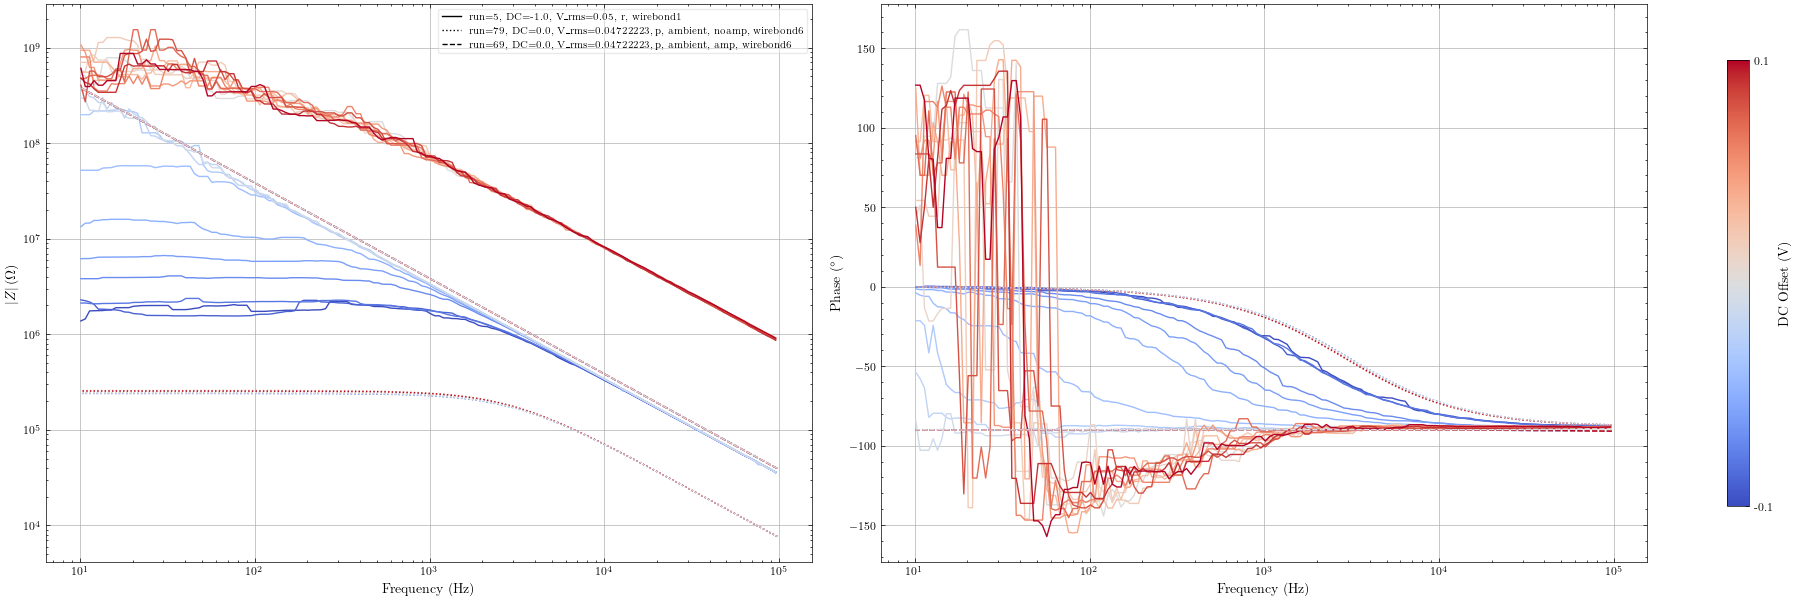

In [4]:
# Select data 
d5 = [solatron[5],solatron[79],solatron[69]]
# extract a single DC level from the data
#d5 = extract_single_dc(d5, DC_val=-0.8)

# Labels
plot_labels = ['wb1, pristine, ambient'] # label for the legend
plot_filename = 'wb1_pristine_Vdc_ambient_instability' # name for exported figure
plot_title = 'Vdc Instability in Pristine Device' # title for powerpoint

# Notes
notes = ['This was before the Au contact issue was realised, likely the cause of the low C state',
         'The device is clearly e-forming during the vDC sweep'] # notes for the powerpoint in text box

# if export true, update the plot string
d5 = update_plot_string(d5, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot(d5, d_type='Zabsphi', freq_lim=[1e1, 1e5],
                    sort_data=False, c_bar=2, fig_size=fig_size, med_filt = 7, force_key = False)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 

# Pristine

### Wirebond 3: Ambient vs Vacuum
- run 51: wirebond3, ambient
- run 52: wirebond3, vacuum

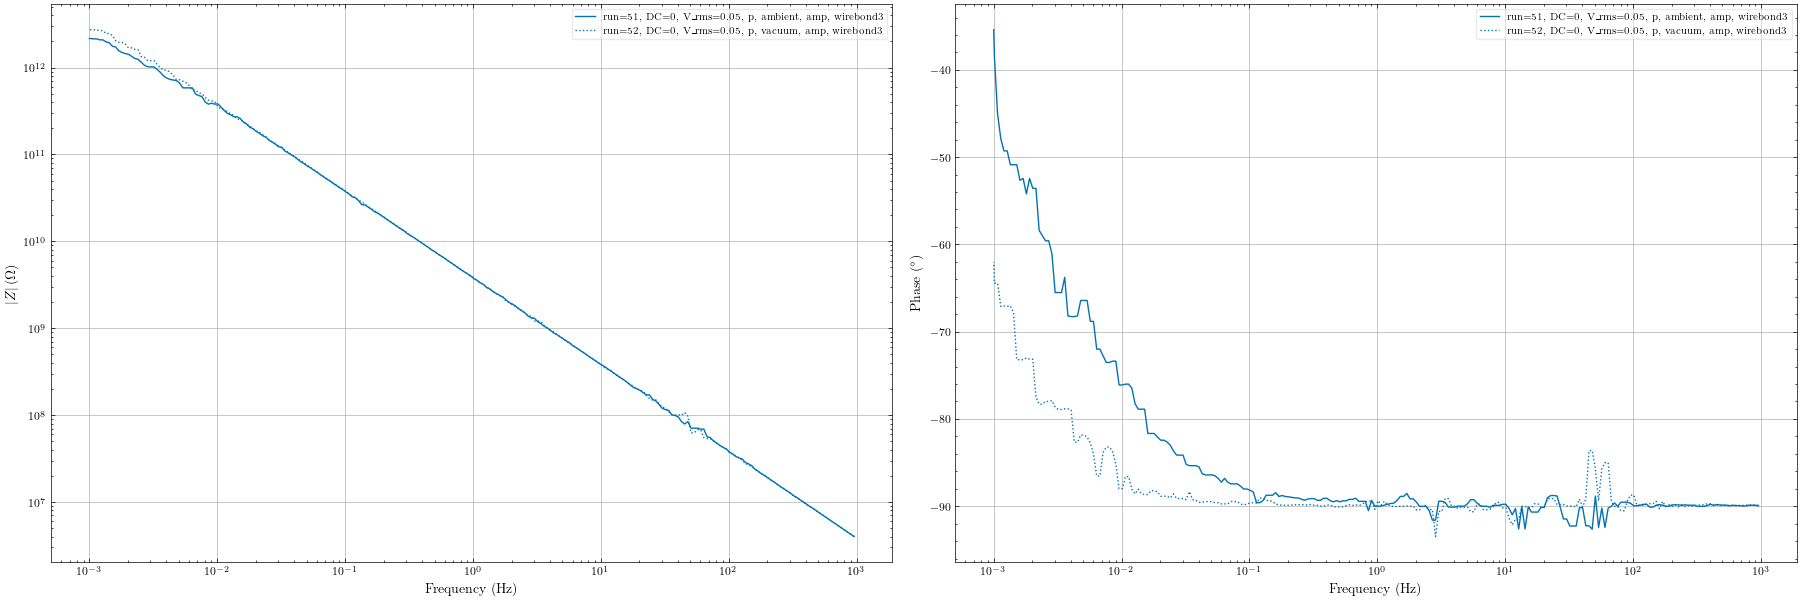

In [5]:
# Select data 
d51 = [solatron[51], solatron[52]]

# Labels
plot_labels = ['wb3, pristine, ambient', 'wb3, pristine, vacuum'] # label for the legend
plot_filename = 'wb3_pristine_ambvac' # name for exported figure
plot_title = 'Ambient vs Vacuum for Pristine Device - WB3' # title for powerpoint

# Notes
notes = [''] # notes for the powerpoint in text box

# if export true, update the plot string
d51 = update_plot_string(d51, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot(d51, d_type='Zabsphi', freq_lim=[0, 1e3],
                    sort_data=False, c_bar=0, fig_size=fig_size, med_filt = 3, force_key = False)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 

### Wirebond 4: Ambient vs Vacuum with V_rms varied
- run 55: wirebond4, ambient
- run 56: wirebond4, vacuum
- run 58: wirebond4, vacuum
- run 59: wirebond4, ambient

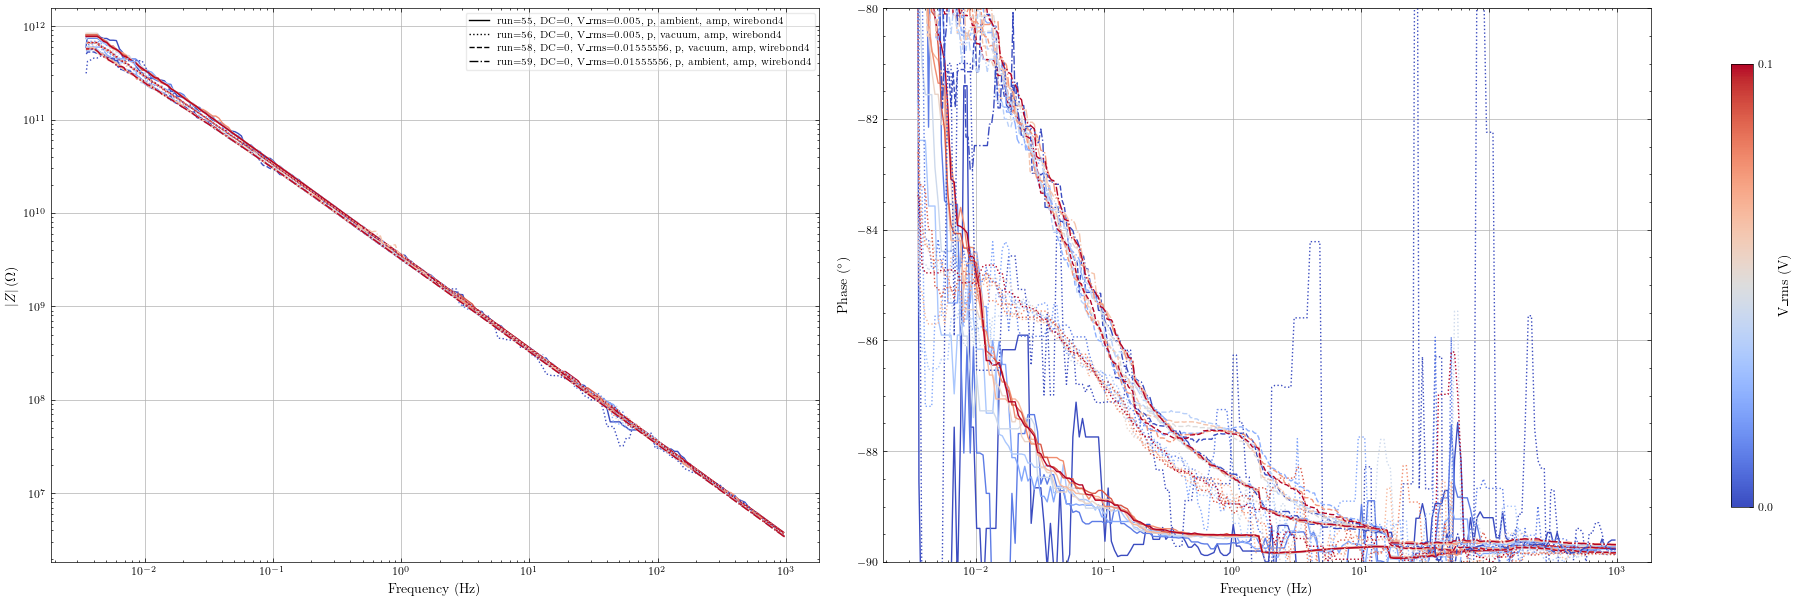

In [6]:
# Select data 
d55 = [solatron[55], solatron[56], solatron[58], solatron[59]]

# Labels
plot_labels = ['wb4, pristine, ambient', 'wb4, pristine, vacuum', 'wb4, pristine, vacuum', 'wb4, pristine, ambient'] # label for the legend
plot_filename = 'wb4_pristine_Vrms_ambvac' # name for exported figure
plot_title = 'Vrms in Ambient vs Vacuum for Pristine Device - WB4' # title for powerpoint

# Notes
notes = [''] # notes for the powerpoint in text box

# if export true, update the plot string
d55 = update_plot_string(d55, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot(d55, d_type='Zabsphi', freq_lim=[0, 1e3], y_lim_right=[-90, -80],
                    sort_data=False, c_bar=3, fig_size=fig_size, med_filt = 9, force_key = False)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 

### Wirebond 4/Wirebond 3: Ambient vs Vacuum with $V_{DC}$
- r60 = wirebond4, vac
- r61 = wirebond4, ambient
- r62 = wirebond3, ambient
- r63 = wirebond3, vac

- Notice that the wirebond 3 has zero phase and infinite resistance
    - This will later prove that **this device won't form**

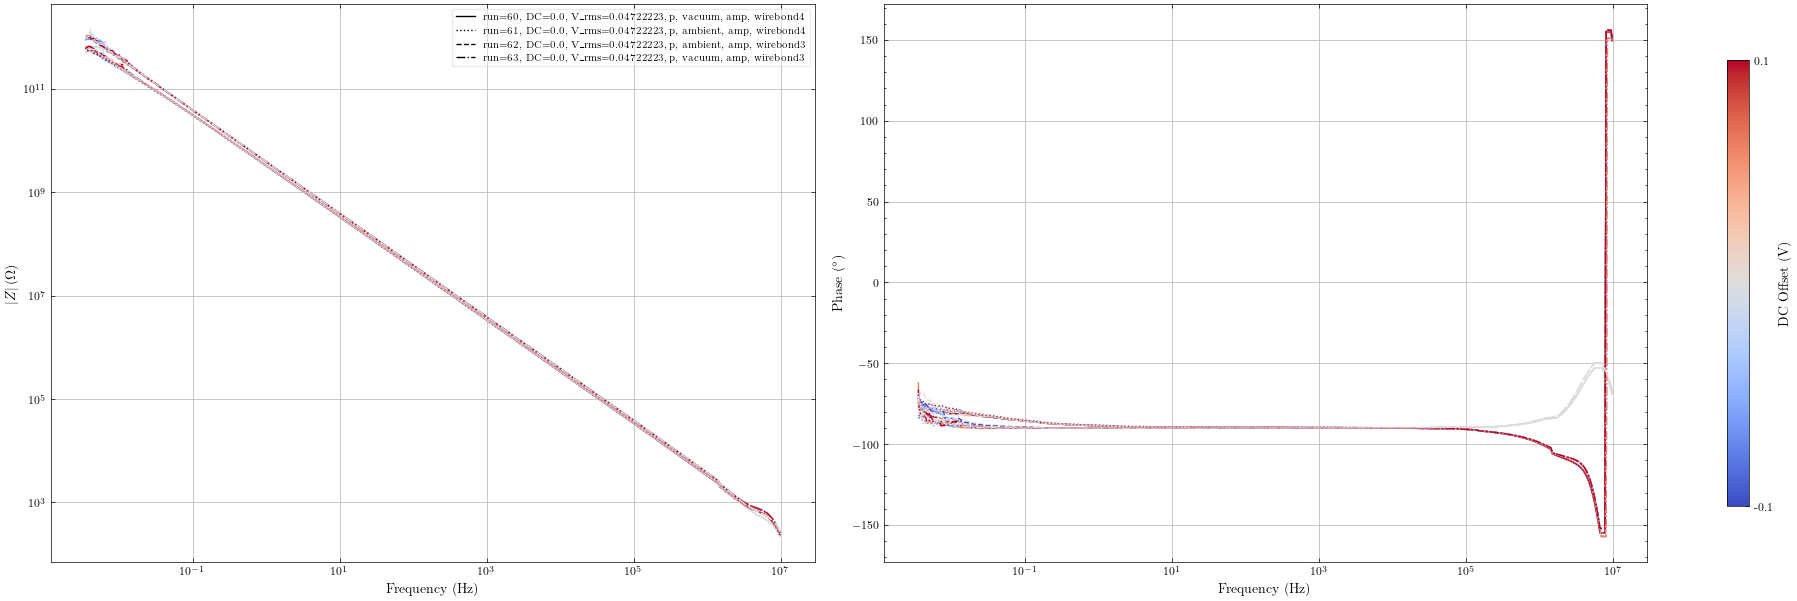

In [7]:
# Select data 
d60 = [solatron[60], solatron[61],solatron[62], solatron[63]]

# Labels
plot_labels = ['wb4, pristine, vacuum', 'wb4, pristine, ambient', 'wb3, pristine, ambient', 'wb3, pristine, vacuum'] # label for the legend
plot_filename = 'wb4wb3_pristine_Vdc_ambvac' # name for exported figure
plot_title = 'Vdc in Ambient vs Vacuum for Pristine Devices - wb3wb4' # title for powerpoint

# Notes
notes = ['- Notice that the wirebond 3 has zero phase and infinite resistance',
        'This will later prove that this device wont form'] # notes for the powerpoint in text box

# if export true, update the plot string
d60 = update_plot_string(d60, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot(d60, d_type='Zabsphi', freq_lim=[1e-3, 1e7], y_lim_right=None,
                    sort_data=False, c_bar=2, fig_size=fig_size, med_filt = 9, force_key = False)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 

### On/Off/Pristine - Across Different Runs

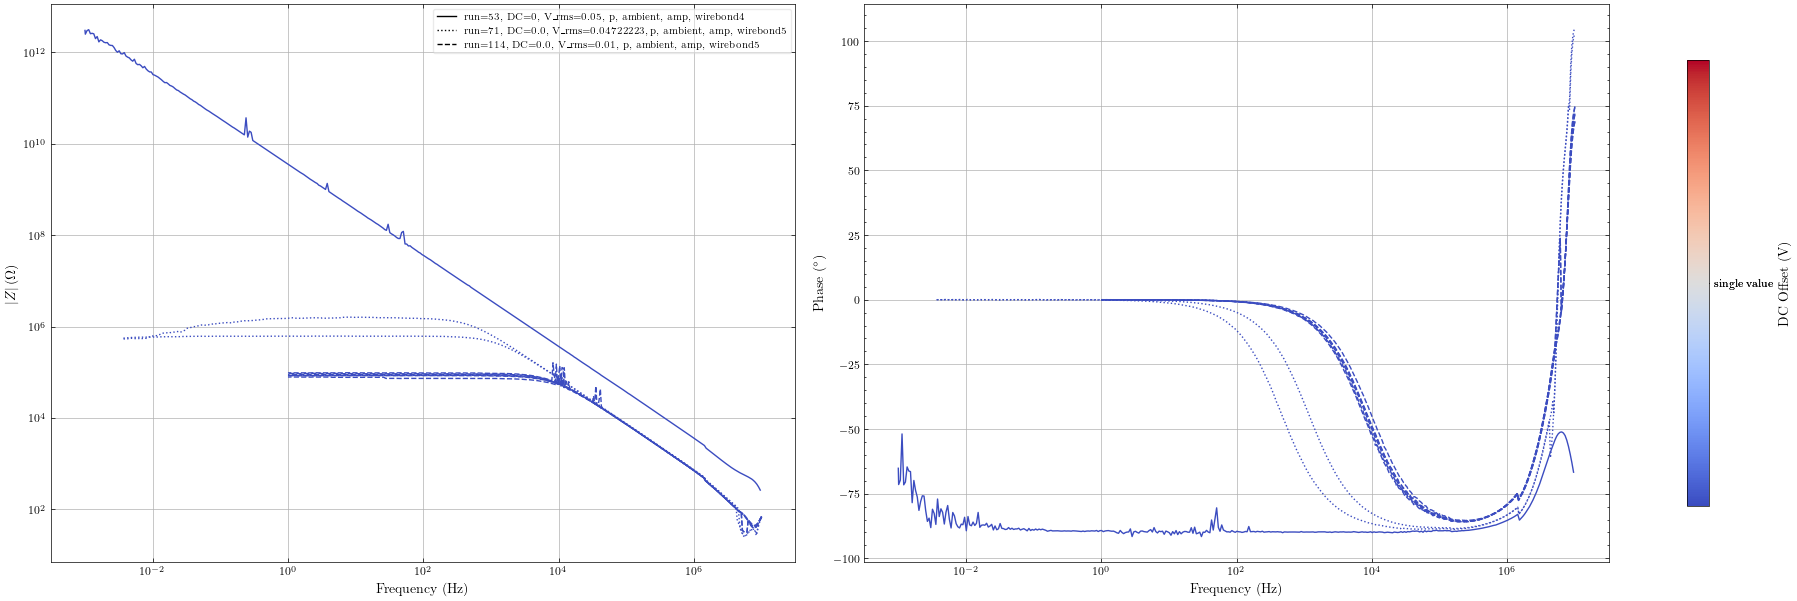

In [8]:
# Select data 
d60 = [solatron[53], solatron[71], solatron[114]]

d60 = extract_single_dc(d60, DC_val=0)
# Labels
plot_labels = ['wb4, pristine, ambient', ''] # label for the legend
plot_filename = 'wb4wb3_pristine_Vdc_ambvac' # name for exported figure
plot_title = 'Vdc in Ambient vs Vacuum for Pristine Devices - wb3wb4' # title for powerpoint

# Notes
notes = ['This is problematic as the Vrms is different for run71'] # notes for the powerpoint in text box

# if export true, update the plot string
d60 = update_plot_string(d60, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot(d60, d_type='Zabsphi', freq_lim=[1e-3, 1e7], y_lim_right=None,
                    sort_data=False, c_bar=2, fig_size=fig_size, med_filt = 1, force_key = False)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 

### SAME DEVICE Pristine vs Formed


--- Starting Fit for: run=79, DC=0.0, V_rms=0.04722223, p, ambient, noamp, wirebond6 ---
Using model: RC
Frequency range: (0, 5000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'C_pad', 'R_series']
550 pts post-freq filter.
Median filter k=5
Running DE...
DE OK.
 DE Final Cost: 4.1501e+11
  DE Best:)
name R_mem1: 7.63e+13
name C_mem1: 9.99e-10
name C_pad: 2.99e-11
name R_series: 2.54e+03

Running LS Refinement...
LS OK!
  LS Final Cost: 4.6798e-01
  Final Fitted Parameters:
    R_mem1: 2.5171e+05
    C_mem1: 2.0598e-10
    C_pad: 1.3099e-11
    R_series: 1.3817e+01


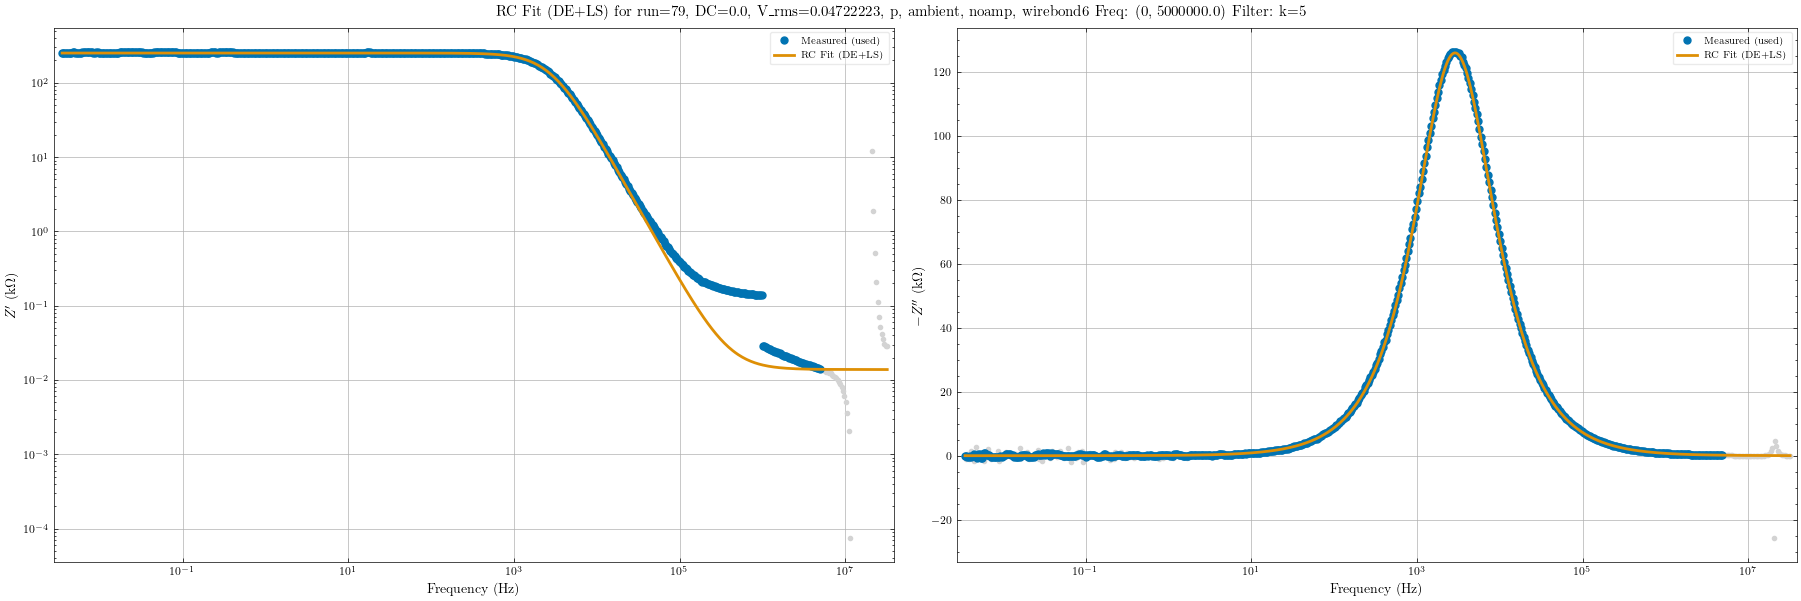


Final Fitted Parameters Dictionary:
{'R_mem1': np.float64(251713.24192533776), 'C_mem1': np.float64(2.0597522103853873e-10), 'C_pad': np.float64(1.3099154772318025e-11), 'R_series': np.float64(13.816766821554662)}
--- Fit finished for: run=79, DC=0.0, V_rms=0.04722223, p, ambient, noamp, wirebond6 ---


In [9]:
# --- Settings ---
fit_settings = {
    'model_type': 'RC', # String: 'RC', 'CPE', 'RC2', or 'CPE2'
    'freq_bounds': (0, 5e6), # Tuple (min_freq, max_freq) for fitting range. None means no limit.
    'med_filt': 5, # Median filter kernel (or 0/None to skip)
    #'fixed_params': {'R_mem1': np.float64(254647.25), 'C_mem1': np.float64(1.9379283048750973e-10), 'C_pad': np.float64(1.8206090757078506e-11), 'R_series': np.float64(150.64021259132736)},#None, # Dictionary mapping parameter names (str) to fixed values.
                            # {'C_pad': 1.5e-11}, # Fix C_pad (or None to fit all)
                            #  {'C_pad': 1.2e-11, 'R_mem': 1e8} # Fix two parameters (for RC model)
    
    'use_de': True,  # If True, perform Differential Evolution before Least Squares IF False to use only Least Squares (requires good initial guess).
    'plot_fit': True, # If True, display the Bode plot of the fit after completion.
    'fig_size': fig_size, # Figure size for the plot (None to use default).
    # Optional: Provide specific bounds/guesses if needed - set to None to use defaults.
    'de_bounds_dict' :{'R_mem1': (1e1, 1e14), 'C_mem1': (1e-13, 1e-9),'R_mem2': (1e1, 1e14), 'C_mem2': (1e-13, 1e-11),
                     'C_pad': (1e-11, 3e-11), 'R_series': (1, 1e4), 'Q1': (1e-12, 1e-7), 'alpha1': (0.6, 1.0),
                      'Q2': (1e-13, 1e-8), 'alpha2': (0.5, 1.0)},
    #'ls_bounds_dict': {'R_mem1': (1e-3, np.inf), 'C_mem1': (0, np.inf), 'R_mem2': (1e-3, np.inf), 
                        # 'C_mem2': (0, np.inf), 'C_pad': (0, np.inf), 'R_series': (0, np.inf), 'Q1': (1e-15, np.inf), 
                        # 'alpha1': (1e-3, 1.0), 'Q2': (1e-15, np.inf), 'alpha2': (1e-3, 1.0)}
                        
    # 'initial_guess_dict': {'R_mem1': 5e7, 'C_mem1': 5e-11, 'R_mem2': 1e5, 'C_mem2': 1e-9, 'C_pad': 2e-11, 'R_series': 70.0,
                             # 'Q1': 4e-11, 'alpha1': 0.92, 'Q2': 5e-10, 'alpha2': 0.85}
    'de_maxiter': 60000, # Max generations (iterations) for Differential Evolution. Increase for complex problems.
    'ls_max_nfev': 3000 # Max function evaluations for Least Squares. Increase if refinement terminates early.
}

# Set the bounds for the Least Squares fit to be the same as the Differential Evolution bounds
fit_settings['ls_bounds_dict'] = fit_settings['de_bounds_dict']

# --- Select Data ---
# Select data 
dfit = [solatron[79][0]] #[solatron[5]]
# extract a single DC level from the data
#dfit = extract_single_dc(dfit, DC_val=0)
data_to_fit = dfit[0] # Get the ISdata object


# --- Run Fit ---
fig, ax = fit_impedance_data(data_to_fit, **fit_settings)

# --- Parameter for Plot Exports ---
# Labels
plot_labels = [' r69'] # label for the legend
plot_filename = ' r69' # name for exported figure
plot_title = 'Trial fitting' # title for powerpoint

# Notes
notes = [''] # notes for the powerpoint in text box

# if export true, update the plot string
dfit = update_plot_string(dfit, export_data=export_data, plot_labels=plot_labels)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 


/Users/horatiocox/Desktop/IS_Analysis/ISvenv/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/horatiocox/Desktop/IS_Analysis/ISvenv/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


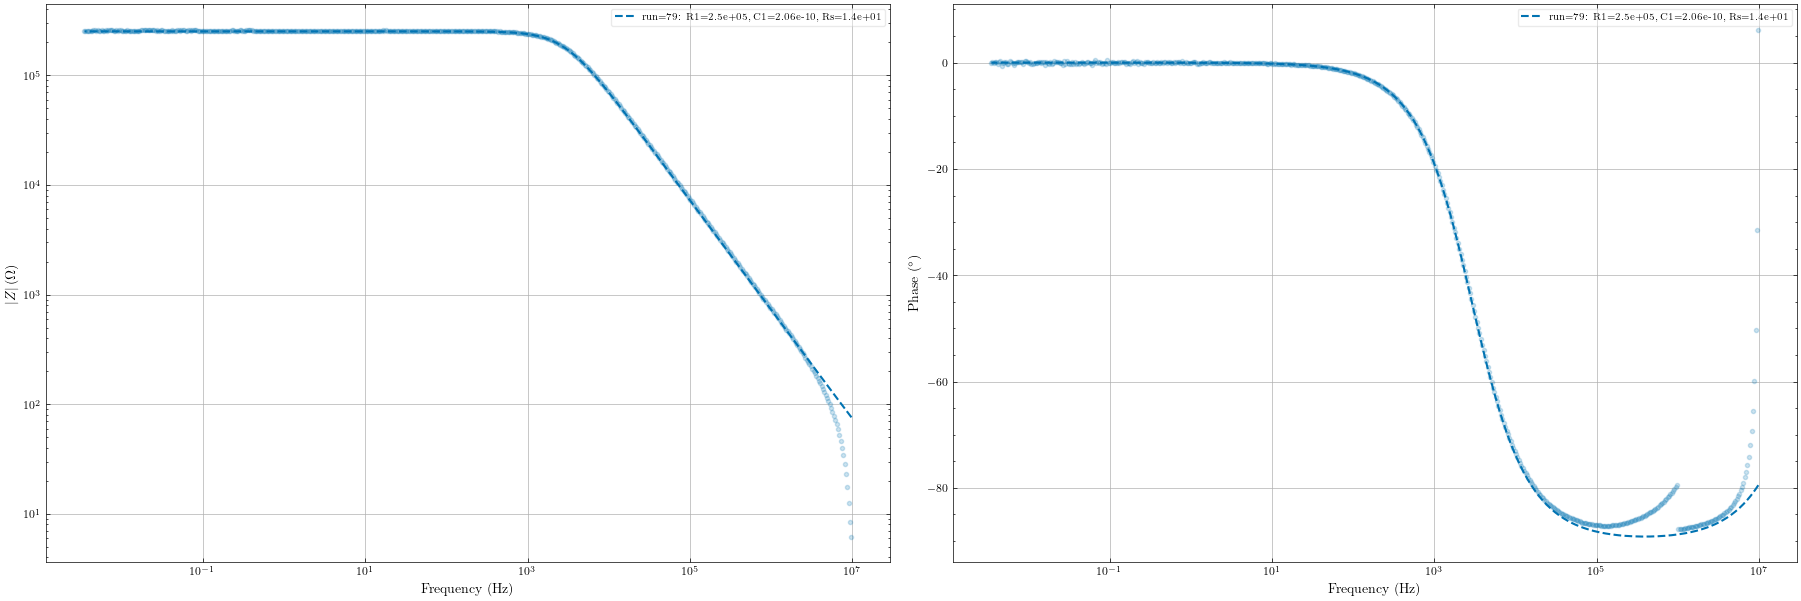

In [10]:
# Select data 
d69 = [solatron[79]] #

# Labels
plot_labels = ['wb6, pristine, ambient', 'wb6, eformed, ambient '] # label for the legend
plot_filename = 'wb6_pristine_vs_forming' # name for exported figure
plot_title = 'Electroforming vs Pristine' # title for powerpoint

# Notes
notes = [''] # notes for the powerpoint in text box

# if export true, update the plot string
d69 = update_plot_string(d69, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot_fit(d69, d_type='Zabsphi', freq_lim=[1e-3, 1e7], y_lim_right=None,
                    sort_data=False,  fig_size=fig_size, med_filt = 1, show_key = True)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 

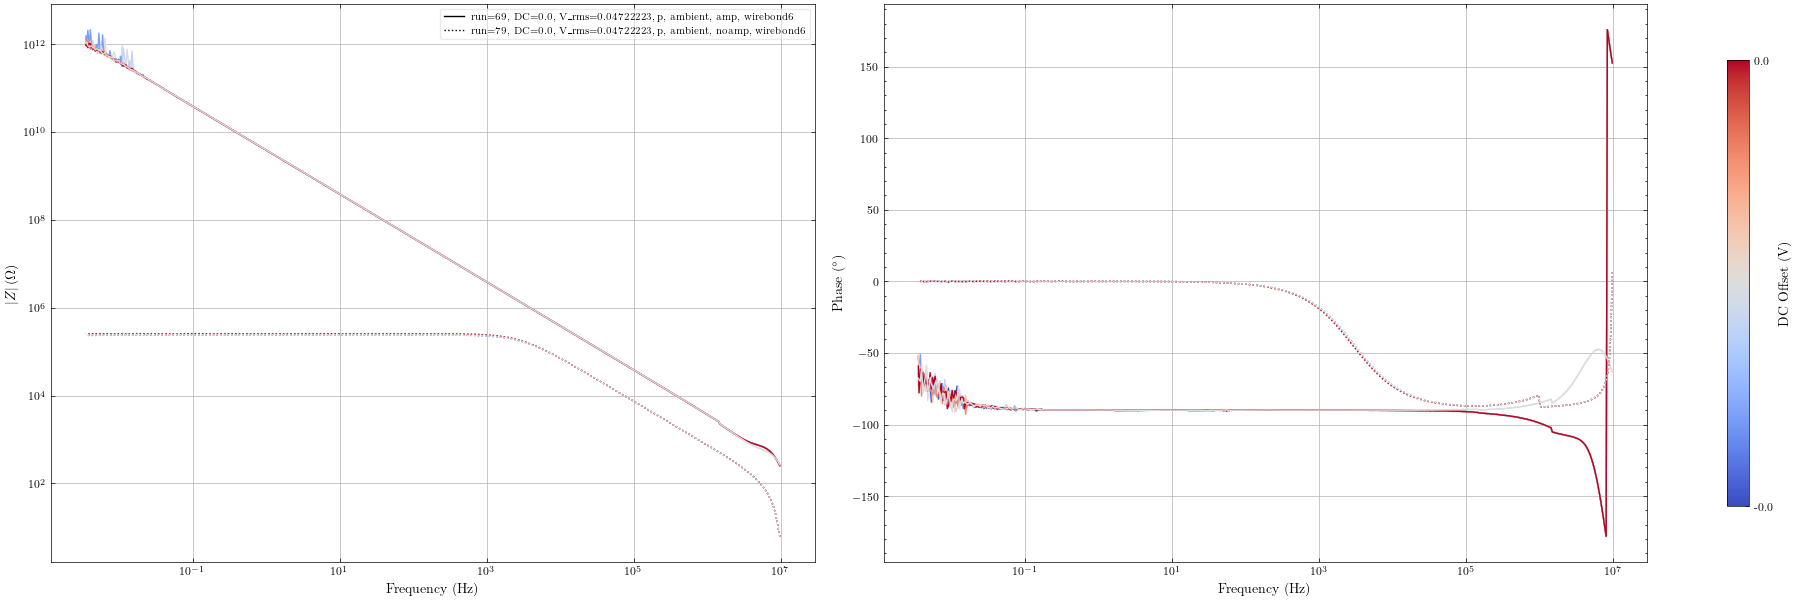

In [11]:
# Select data 
d69 = [solatron[69], solatron[79]] #

# Labels
plot_labels = ['wb6, pristine, ambient', 'wb6, eformed, ambient '] # label for the legend
plot_filename = 'wb6_pristine_vs_forming' # name for exported figure
plot_title = 'Electroforming vs Pristine' # title for powerpoint

# Notes
notes = [''] # notes for the powerpoint in text box

# if export true, update the plot string
d69 = update_plot_string(d69, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot(d69, d_type='Zabsphi', freq_lim=[1e-3, 1e7], y_lim_right=None,
                    sort_data=False, c_bar=2, fig_size=fig_size, med_filt = 1, force_key = False)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 

### Live DC Switching

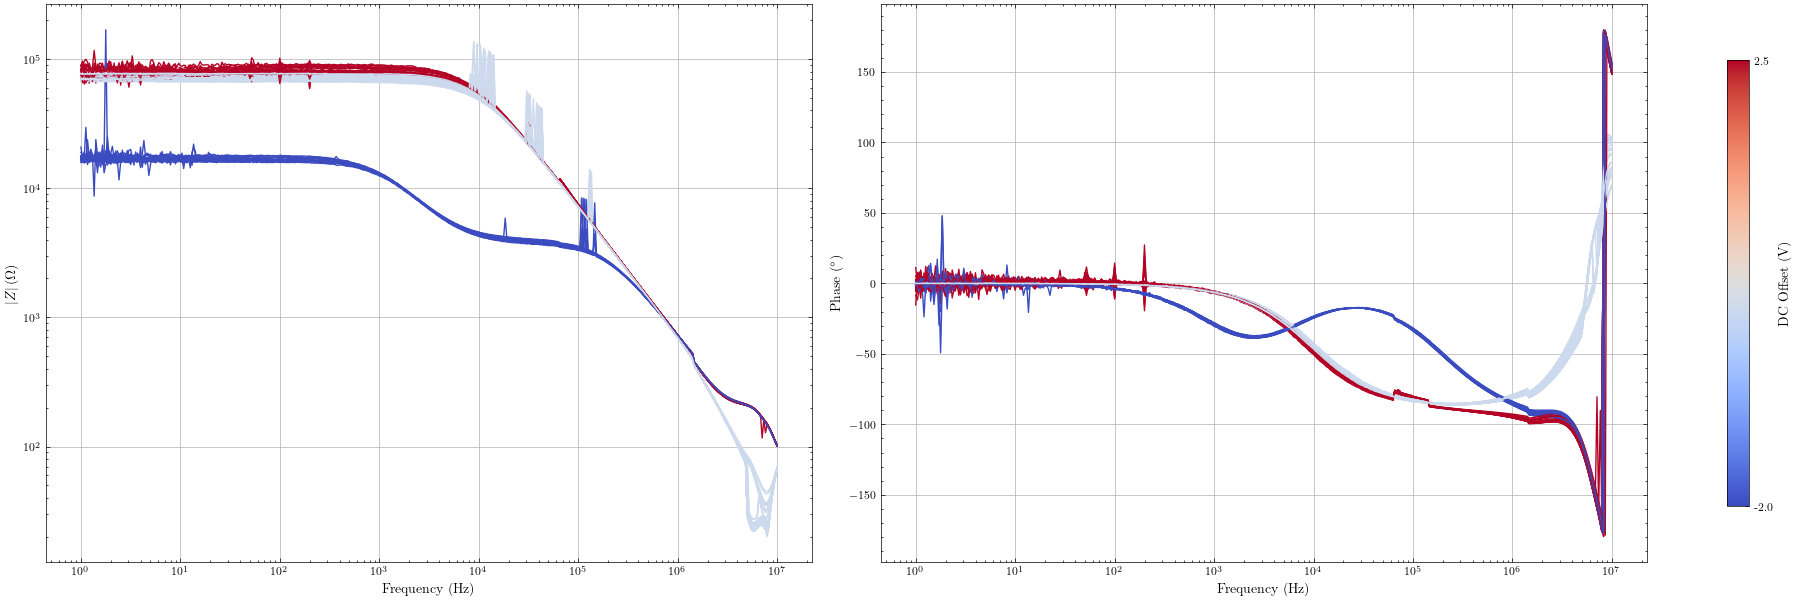

In [12]:
# Select data 
d = [solatron[115]] #

# Labels
plot_labels = ['wb5, formed, ambient'] # label for the legend
plot_filename = 'wb5_liveswitching' # name for exported figure
plot_title = 'Switching Device with DC Offset' # title for powerpoint

# Notes
notes = [''] # notes for the powerpoint in text box

# if export true, update the plot string
d = update_plot_string(d, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot(d, d_type='Zabsphi', freq_lim=[1e-3, 1e7], y_lim_right=None,
                    sort_data=False, c_bar=2, fig_size=fig_size, med_filt = 1, force_key = False)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 

### Live Switching Ambient vs Vacuum

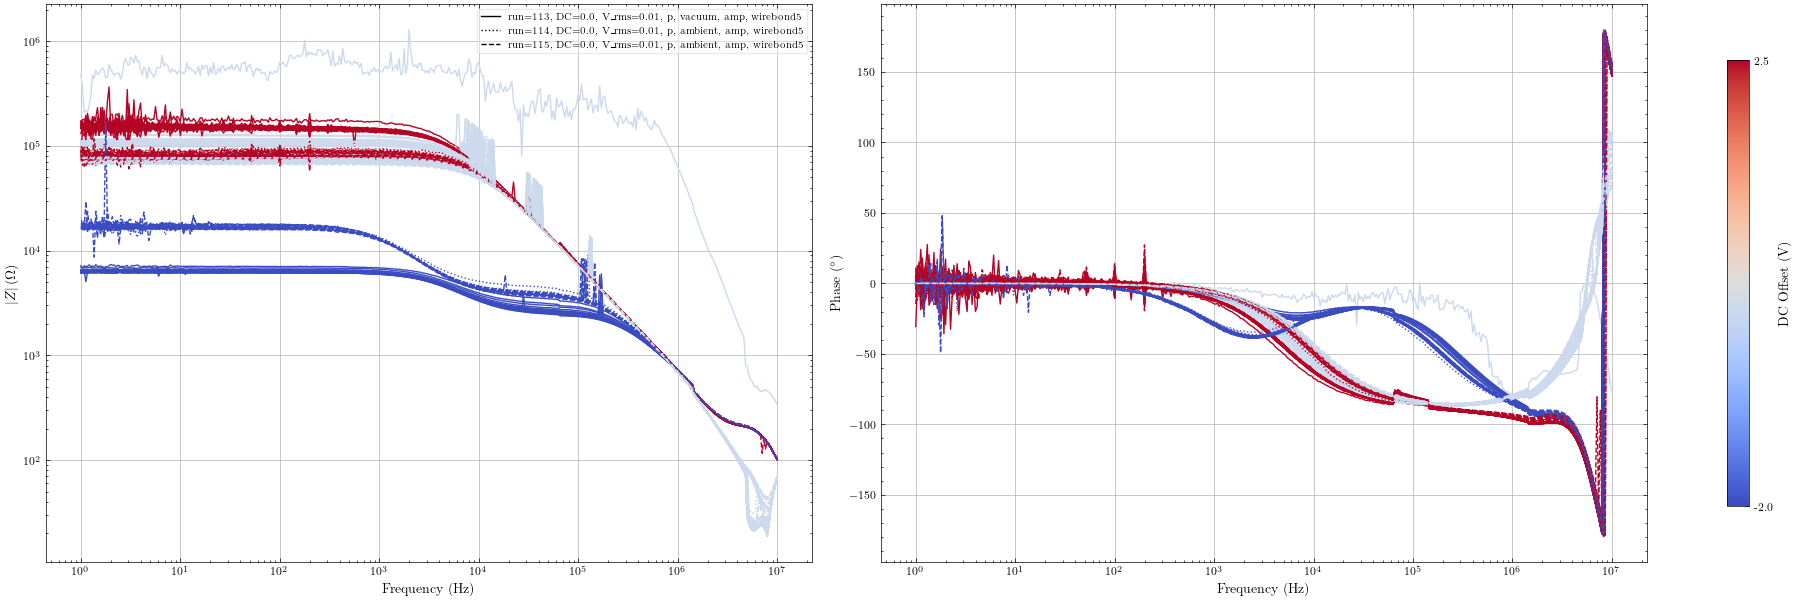

In [13]:
# Select data 
d = [solatron[113],solatron[114],solatron[115]] 
# extract a single DC level from the data
#d = extract_single_dc(d, DC_val=0)

# Labels
plot_labels = ['wb5, formed, vacuum', 'wb5, formed, ambient-failed', 'wb5, formed, ambient'] # label for the legend
plot_filename = 'wb5_liveswitching_ambvsvac' # name for exported figure
plot_title = 'Switching Device with DC Offset in Vacuum and Ambient' # title for powerpoint

# Notes
notes = ['All runs use a loop [0, 2.5V, 0, -2V] to measure state then switch ON/OFF then measure state'
        'Vacuum was left at 9e-7 for 3 days before starting the run',
         'First ambient run was started after 7 hours at ambient but crashed part way through',
         'Second ambient run was started 2 days after the vacuum and completed successfully',
         ] # notes for the powerpoint in text box

# if export true, update the plot string
d = update_plot_string(d, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot(d, d_type='Zabsphi', freq_lim=[1e-3, 1e7], y_lim_right=None,
                    sort_data=False, c_bar=2, fig_size=fig_size, med_filt = 1, force_key = False)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 

### Live Switching: Ambient vs Vacuum with Looped $V_{DC}$ sweep -> Gives Many Resistance States with DC=0

/Users/horatiocox/Desktop/IS_Analysis/ISvenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


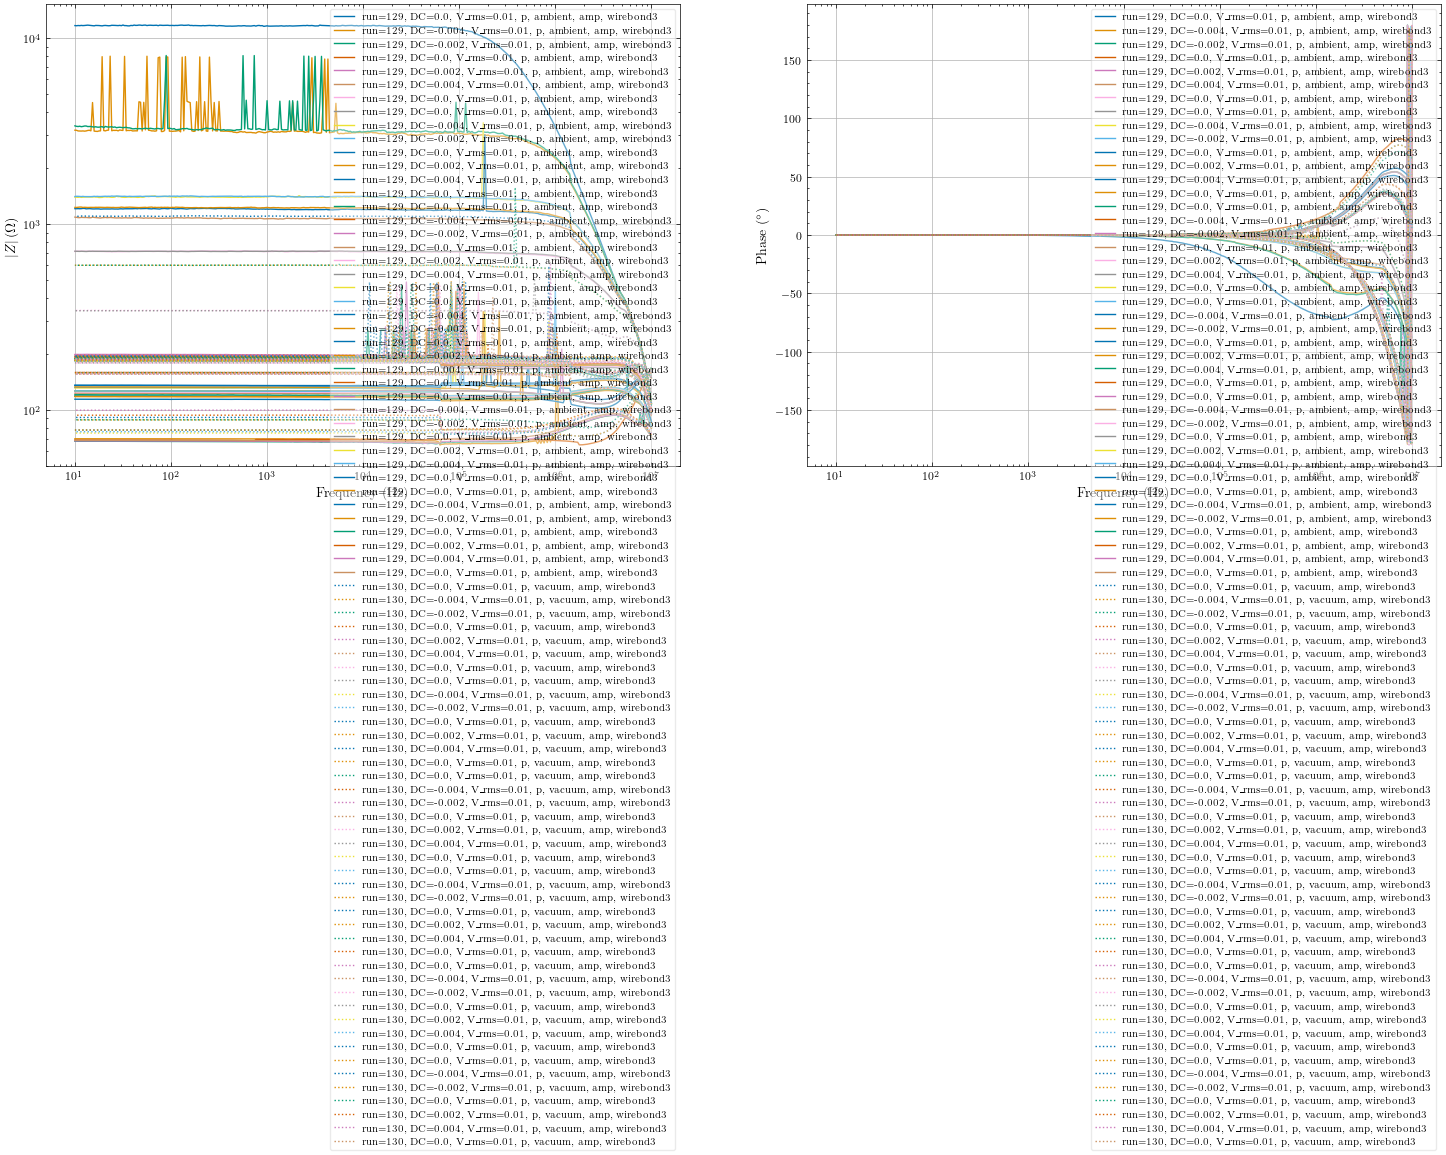

In [14]:
# Select data 
d = [solatron[129],solatron[130]] 
# Extract a single DC offset from the data
d = extract_single_dc(d, DC_val=0)

# Labels
plot_labels = ['wb5, formed, vacuum', 'wb5, formed, ambient-failed', 'wb5, formed, ambient'] # label for the legend
plot_filename = 'wb5_liveswitching_ambvsvac' # name for exported figure
plot_title = 'Switching Device with DC Offset in Vacuum and Ambient' # title for powerpoint

# Notes
notes = [''
         ] # notes for the powerpoint in text box

# if export true, update the plot string
d = update_plot_string(d, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot(d, d_type='Zabsphi', freq_lim=[1e-3, 1e7], y_lim_right=None,
                    sort_data=False, c_bar=0, fig_size=fig_size, med_filt = 1, force_key = False)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 

# Ambient vs Vacuum Stable Changes

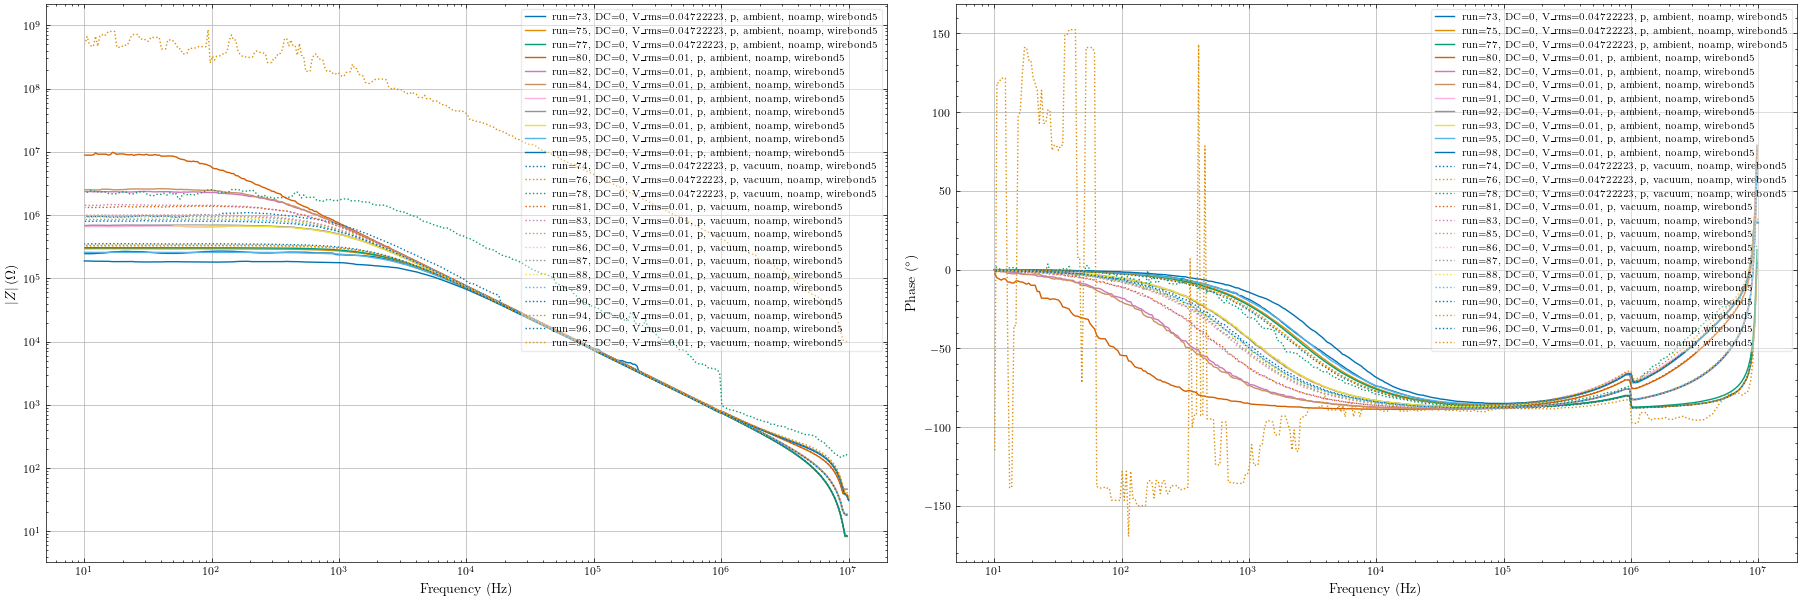

In [15]:
# Select data 
d73 = [ [solatron[73][0], solatron[75][0], solatron[77][0], solatron[80][0], solatron[82][0], solatron[84][0], solatron[91][0], solatron[92][0], solatron[93][0], solatron[95][0], solatron[98][0] ],  [solatron[74][0], solatron[76][0],solatron[78][0], solatron[81][0], solatron[83][0], solatron[85][0], solatron[86][0], solatron[87][0], solatron[88][0], solatron[89][0], solatron[90][0], solatron[94][0], solatron[96][0], solatron[97][0]] ] #

# Labels
plot_labels = ['wb5, formed, ambient'] # label for the legend
plot_filename = 'wb5_liveswitching' # name for exported figure
plot_title = 'Switching Device with DC Offset' # title for powerpoint

# Notes
notes = [''] # notes for the powerpoint in text box

# if export true, update the plot string
d73 = update_plot_string(d73, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot(d73, d_type='Zabsphi', freq_lim=[1e1, 1e7], y_lim_right=None,
                    sort_data=False, c_bar=0, fig_size=fig_size, med_filt = 5, force_key = False)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 


--- Starting Fit for: run=73, DC=0, V_rms=0.04722223, p, ambient, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': 1.9147705850766482e-11}
Frequency range: (0.1, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
420 pts post-freq filter.
Median filter k=5
Running DE...
DE OK.
 DE Final Cost: 5.0486e-01
  DE Best:)
name R_mem1: 2.56e+05
name C_mem1: 1.94e-10
name R_series: 1.45e+02

Running LS Refinement...
LS OK!
  LS Final Cost: 2.5237e-01
  Final Fitted Parameters:
    R_mem1: 2.5617e+05
    C_mem1: 1.9342e-10
    C_pad: 1.9148e-11
    R_series: 1.4271e+02


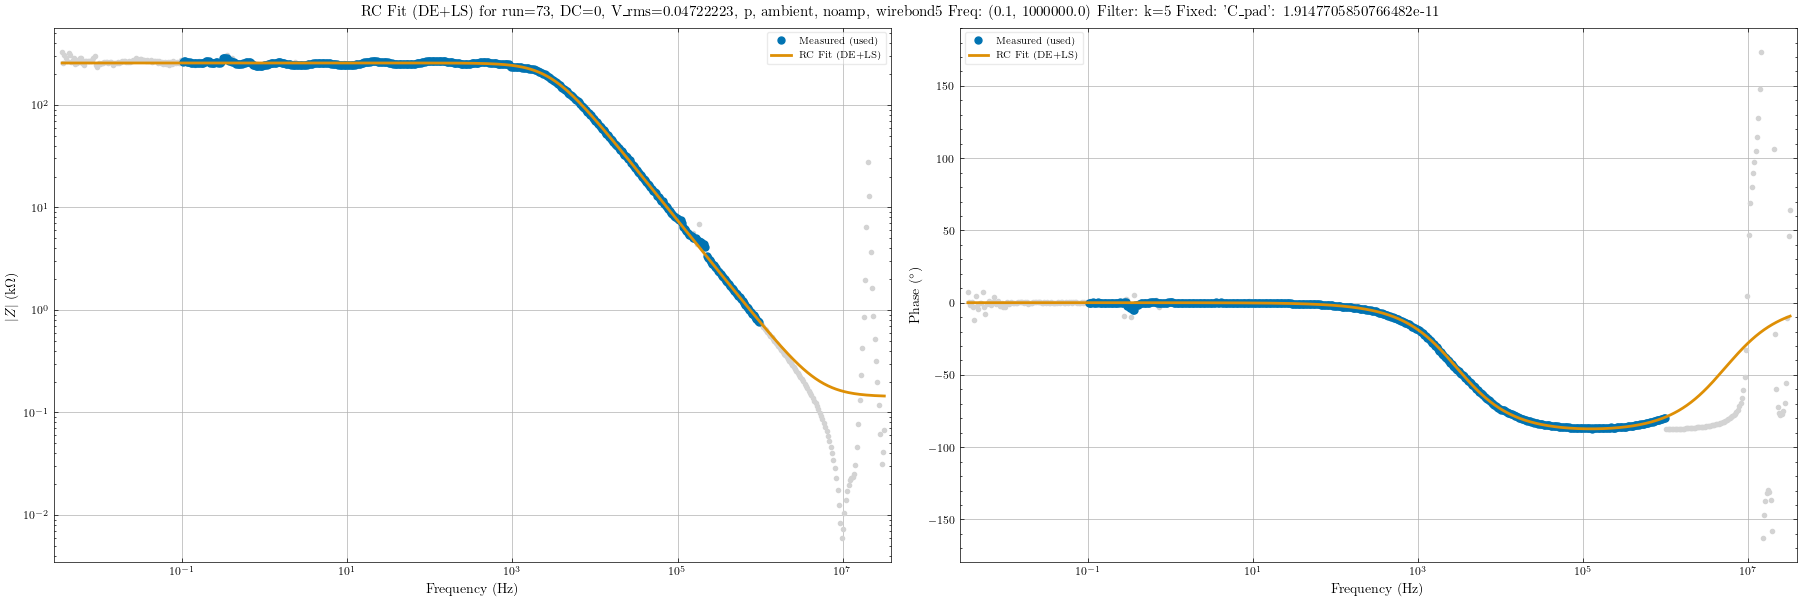


Final Fitted Parameters Dictionary:
{'C_pad': 1.9147705850766482e-11, 'R_mem1': np.float64(256171.30850156603), 'C_mem1': np.float64(1.9341580761797643e-10), 'R_series': np.float64(142.70595312639958)}
--- Fit finished for: run=73, DC=0, V_rms=0.04722223, p, ambient, noamp, wirebond5 ---

--- Starting Fit for: run=75, DC=0, V_rms=0.04722223, p, ambient, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': 1.9147705850766482e-11}
Frequency range: (0.1, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
420 pts post-freq filter.
Median filter k=5
Running DE...
DE OK.
 DE Final Cost: 4.7090e-02
  DE Best:)
name R_mem1: 2.95e+05
name C_mem1: 1.97e-10
name R_series: 1.42e+02

Running LS Refinement...
LS OK!
  LS Final Cost: 2.3545e-02
  Final Fitted Parameters:
    R_mem1: 2.9456e+05
    C_mem1: 1.9743e-10
    C_pad: 1.9148e-11
    R_series: 1.4163e+02


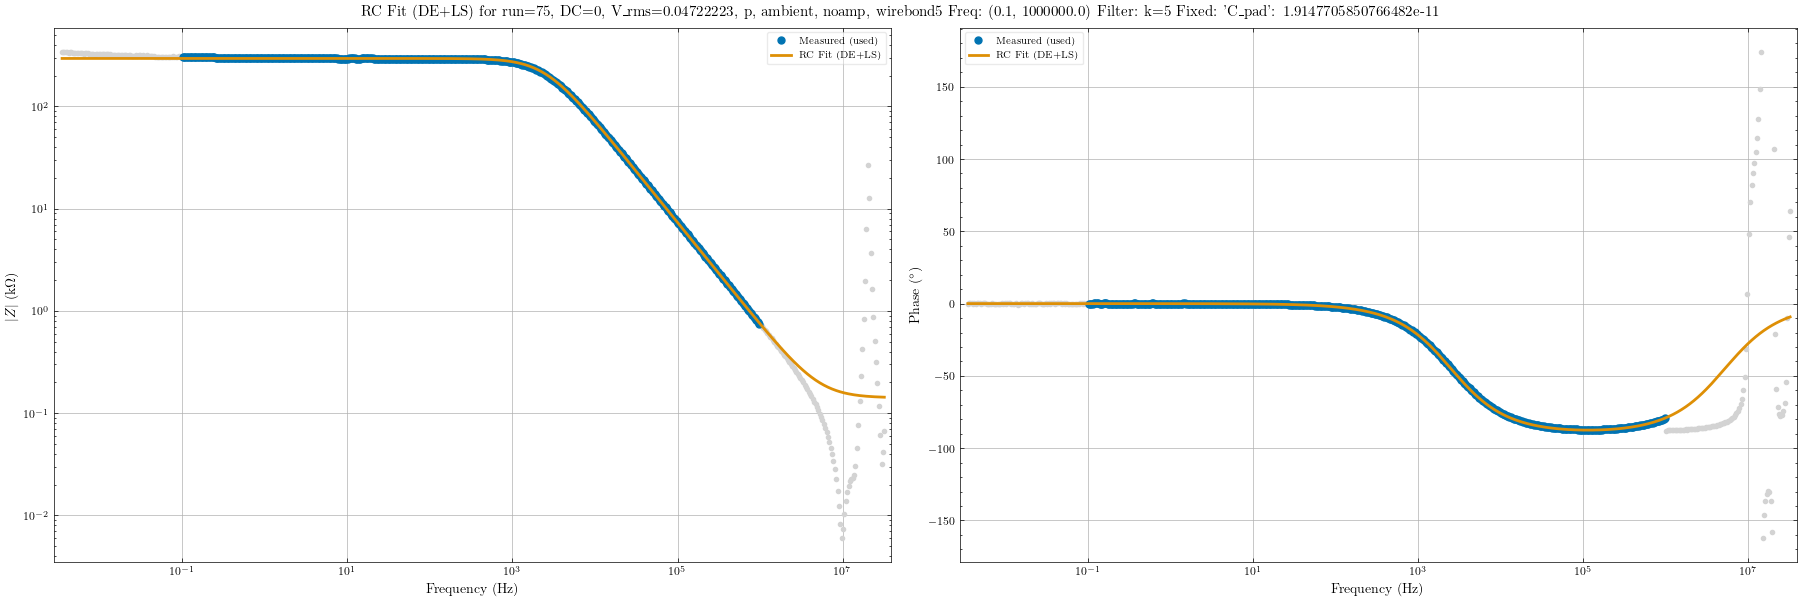


Final Fitted Parameters Dictionary:
{'C_pad': 1.9147705850766482e-11, 'R_mem1': np.float64(294561.7119369507), 'C_mem1': np.float64(1.974299933723901e-10), 'R_series': np.float64(141.63319192341442)}
--- Fit finished for: run=75, DC=0, V_rms=0.04722223, p, ambient, noamp, wirebond5 ---

--- Starting Fit for: run=77, DC=0, V_rms=0.04722223, p, ambient, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': 1.9147705850766482e-11}
Frequency range: (0.1, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
420 pts post-freq filter.
Median filter k=5
Running DE...
DE OK.
 DE Final Cost: 1.9053e-02
  DE Best:)
name R_mem1: 3.05e+05
name C_mem1: 1.97e-10
name R_series: 1.47e+02

Running LS Refinement...
LS OK!
  LS Final Cost: 9.5265e-03
  Final Fitted Parameters:
    R_mem1: 3.0453e+05
    C_mem1: 1.9712e-10
    C_pad: 1.9148e-11
    R_series: 1.4662e+02


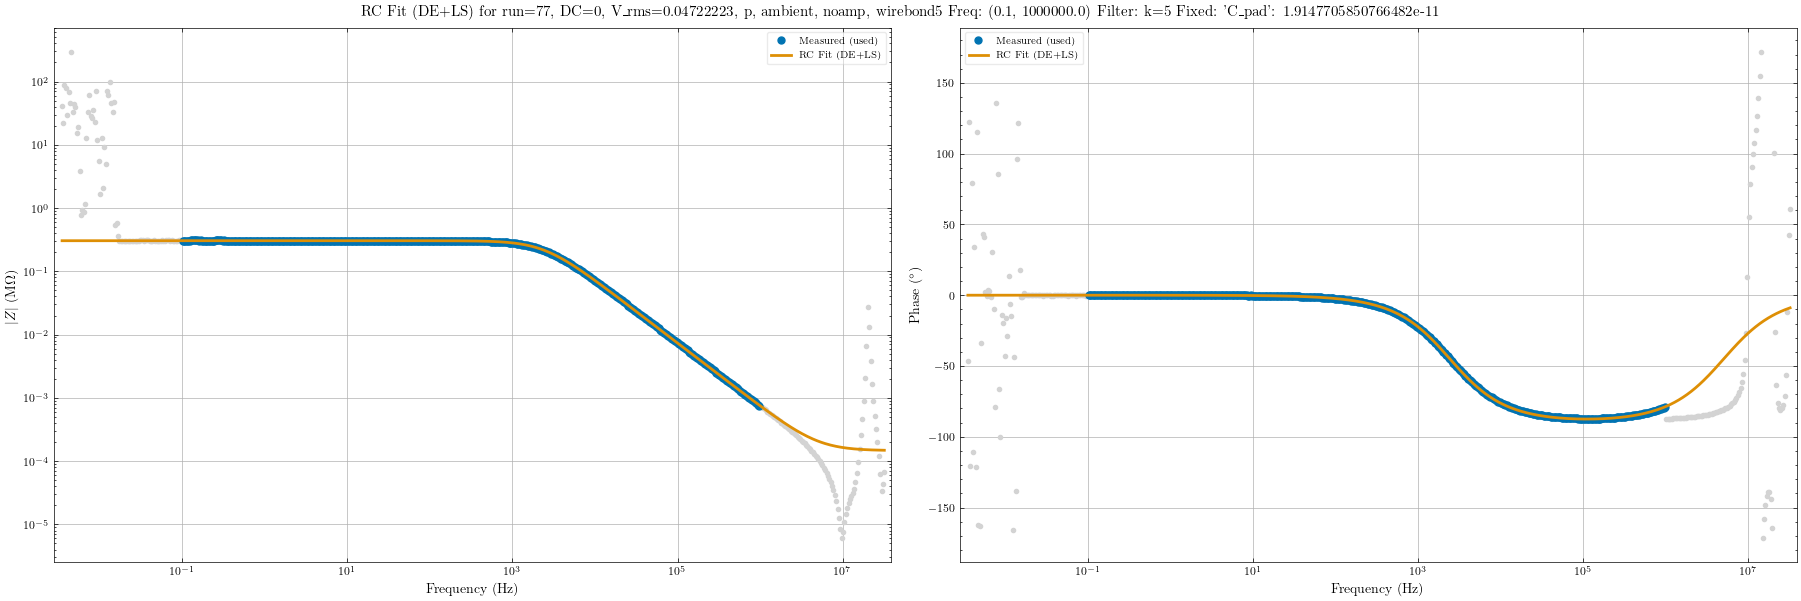


Final Fitted Parameters Dictionary:
{'C_pad': 1.9147705850766482e-11, 'R_mem1': np.float64(304529.52686309814), 'C_mem1': np.float64(1.971213297818012e-10), 'R_series': np.float64(146.61730733844706)}
--- Fit finished for: run=77, DC=0, V_rms=0.04722223, p, ambient, noamp, wirebond5 ---

--- Starting Fit for: run=80, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': 1.9147705850766482e-11}
Frequency range: (0.1, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
361 pts post-freq filter.
Median filter k=5
Running DE...
DE OK.
 DE Final Cost: 1.3505e+00
  DE Best:)
name R_mem1: 9.00e+06
name C_mem1: 1.91e-10
name R_series: 3.08e+02

Running LS Refinement...
LS OK!
  LS Final Cost: 6.7523e-01
  Final Fitted Parameters:
    R_mem1: 8.9991e+06
    C_mem1: 1.9115e-10
    C_pad: 1.9148e-11
    R_series: 3.0770e+02


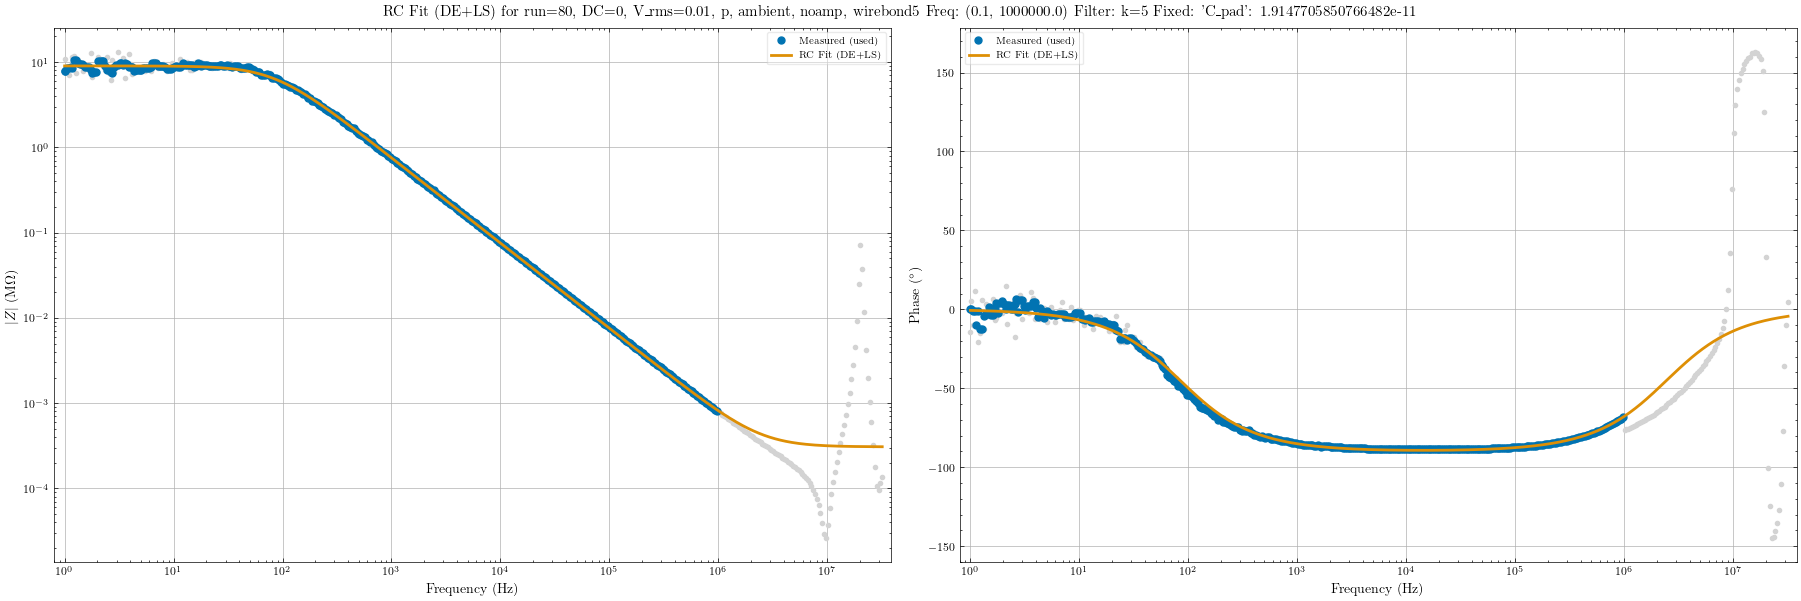


Final Fitted Parameters Dictionary:
{'C_pad': 1.9147705850766482e-11, 'R_mem1': np.float64(8999093.240066528), 'C_mem1': np.float64(1.911517440973958e-10), 'R_series': np.float64(307.7000802480943)}
--- Fit finished for: run=80, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---

--- Starting Fit for: run=82, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': 1.9147705850766482e-11}
Frequency range: (0.1, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
361 pts post-freq filter.
Median filter k=5
Running DE...
DE OK.
 DE Final Cost: 3.2606e+04
  DE Best:)
name R_mem1: 1.00e+08
name C_mem1: 1.00e-09
name R_series: 1.99e+02

Running LS Refinement...
LS OK!
  LS Final Cost: 5.1172e+00
  Final Fitted Parameters:
    R_mem1: 2.2294e+06
    C_mem1: 1.5393e-10
    C_pad: 1.9148e-11
    R_series: 1.9841e+02


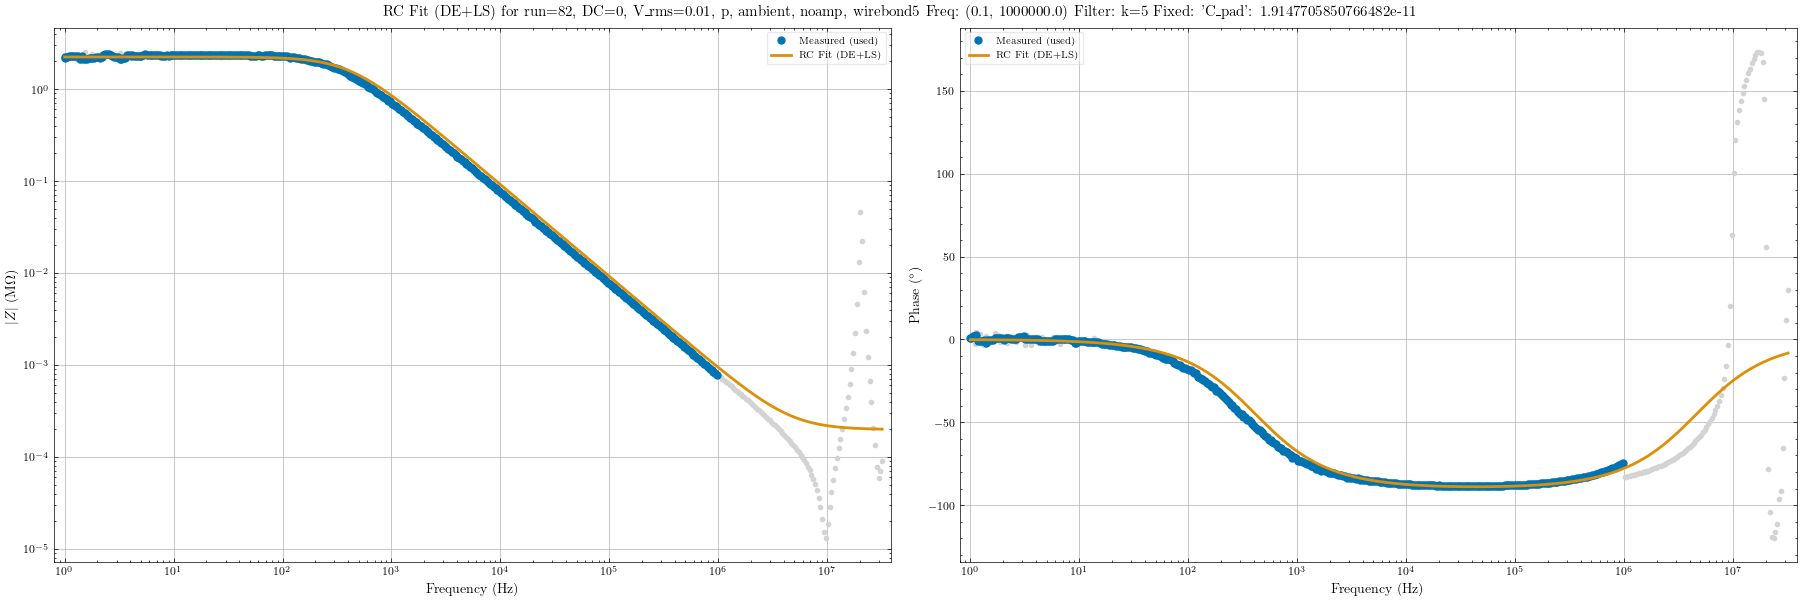


Final Fitted Parameters Dictionary:
{'C_pad': 1.9147705850766482e-11, 'R_mem1': np.float64(2229375.0113334246), 'C_mem1': np.float64(1.5393360776196427e-10), 'R_series': np.float64(198.40858221194011)}
--- Fit finished for: run=82, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---

--- Starting Fit for: run=84, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': 1.9147705850766482e-11}
Frequency range: (0.1, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
361 pts post-freq filter.
Median filter k=5
Running DE...
DE OK.
 DE Final Cost: 2.2043e-01
  DE Best:)
name R_mem1: 2.54e+06
name C_mem1: 1.93e-10
name R_series: 2.11e+02

Running LS Refinement...
LS OK!
  LS Final Cost: 1.1021e-01
  Final Fitted Parameters:
    R_mem1: 2.5444e+06
    C_mem1: 1.9296e-10
    C_pad: 1.9148e-11
    R_series: 2.1121e+02


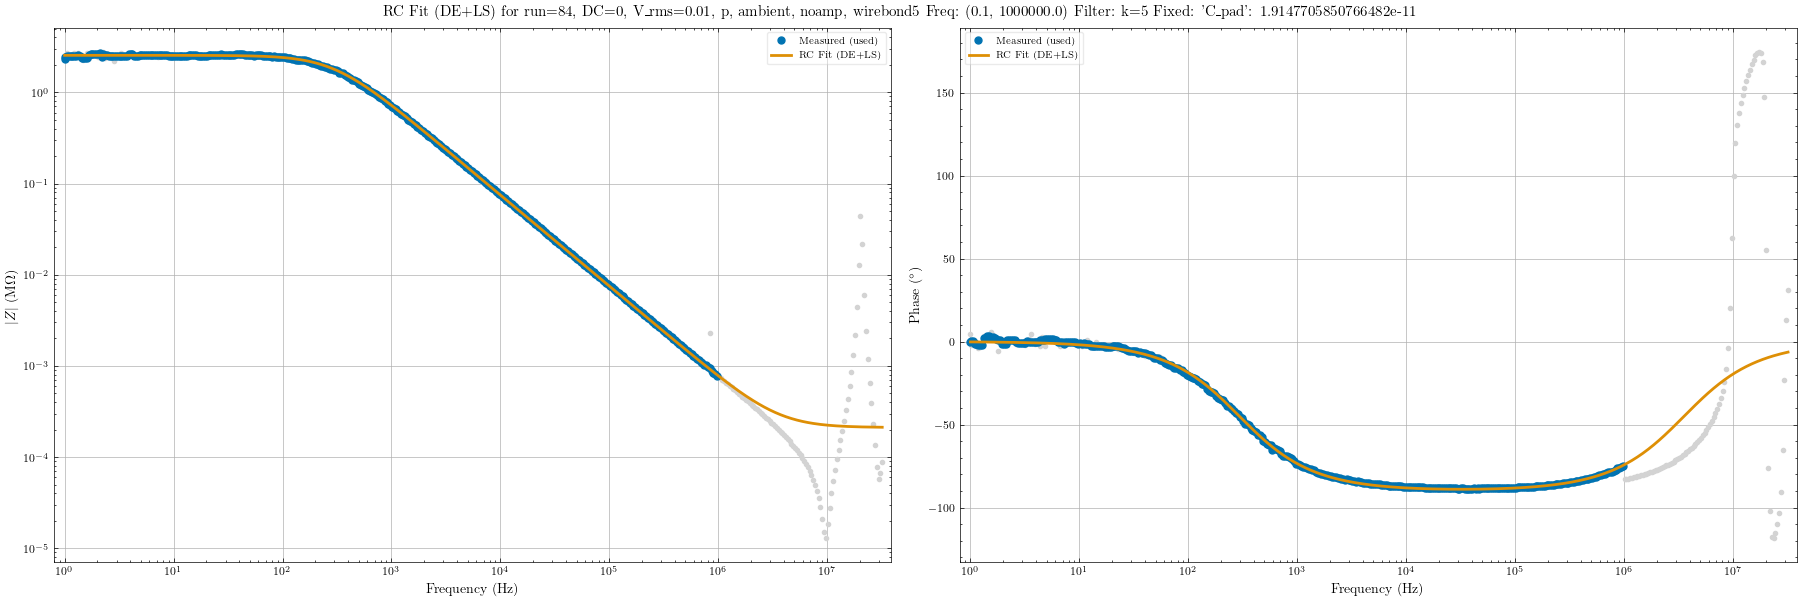


Final Fitted Parameters Dictionary:
{'C_pad': 1.9147705850766482e-11, 'R_mem1': np.float64(2544399.2955322266), 'C_mem1': np.float64(1.9295640534022397e-10), 'R_series': np.float64(211.2124210902648)}
--- Fit finished for: run=84, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---

--- Starting Fit for: run=91, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': 1.9147705850766482e-11}
Frequency range: (0.1, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
361 pts post-freq filter.
Median filter k=5
Running DE...
DE OK.
 DE Final Cost: 8.3199e+05
  DE Best:)
name R_mem1: 1.02e+09
name C_mem1: 1.00e-09
name R_series: 3.24e+02

Running LS Refinement...
LS OK!
  LS Final Cost: 3.9471e+00
  Final Fitted Parameters:
    R_mem1: 6.3699e+05
    C_mem1: 1.6126e-10
    C_pad: 1.9148e-11
    R_series: 3.2003e+02


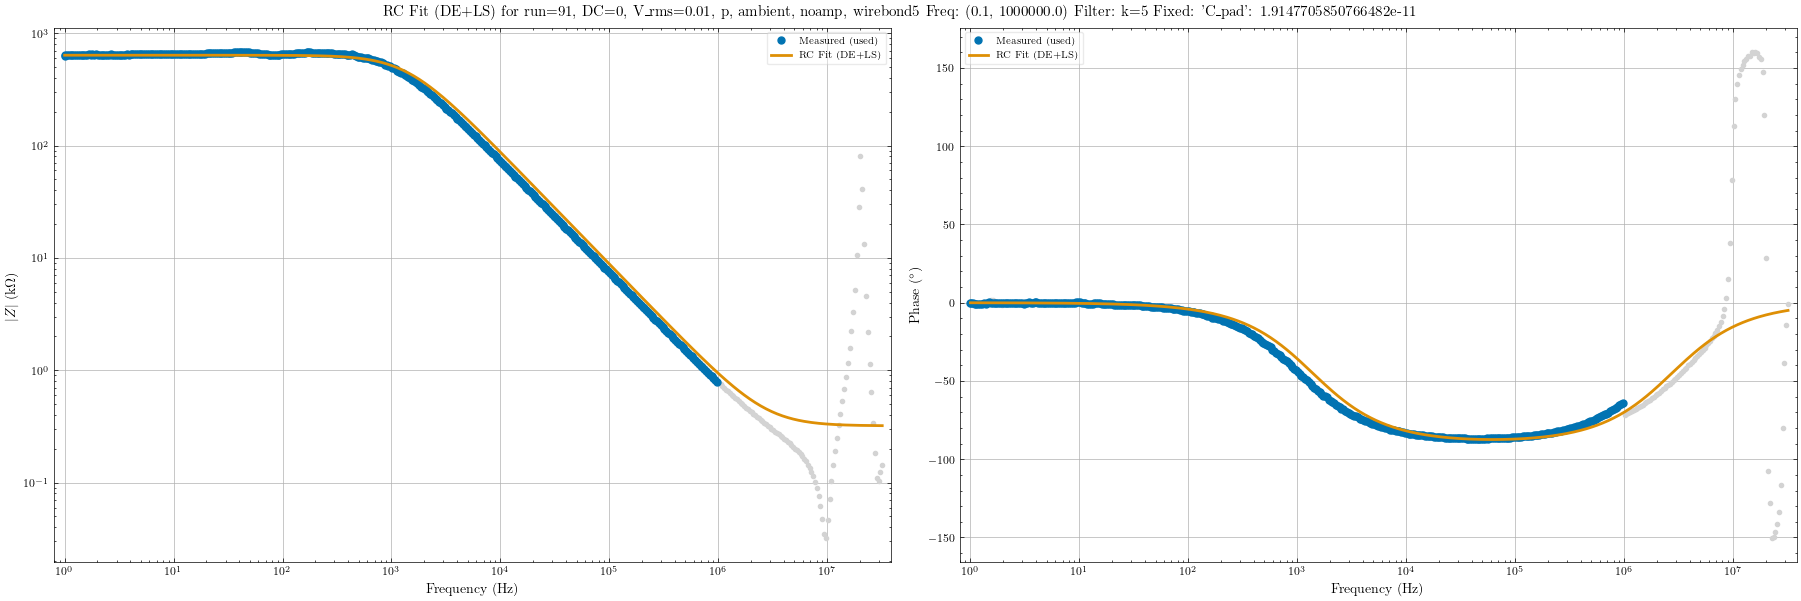


Final Fitted Parameters Dictionary:
{'C_pad': 1.9147705850766482e-11, 'R_mem1': np.float64(636989.2091659062), 'C_mem1': np.float64(1.6126353936095476e-10), 'R_series': np.float64(320.0260385151643)}
--- Fit finished for: run=91, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---

--- Starting Fit for: run=92, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': 1.9147705850766482e-11}
Frequency range: (0.1, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
361 pts post-freq filter.
Median filter k=5
Running DE...
DE OK.
 DE Final Cost: 6.5227e-02
  DE Best:)
name R_mem1: 6.89e+05
name C_mem1: 1.99e-10
name R_series: 3.37e+02

Running LS Refinement...
LS OK!
  LS Final Cost: 3.2613e-02
  Final Fitted Parameters:
    R_mem1: 6.8949e+05
    C_mem1: 1.9916e-10
    C_pad: 1.9148e-11
    R_series: 3.3699e+02


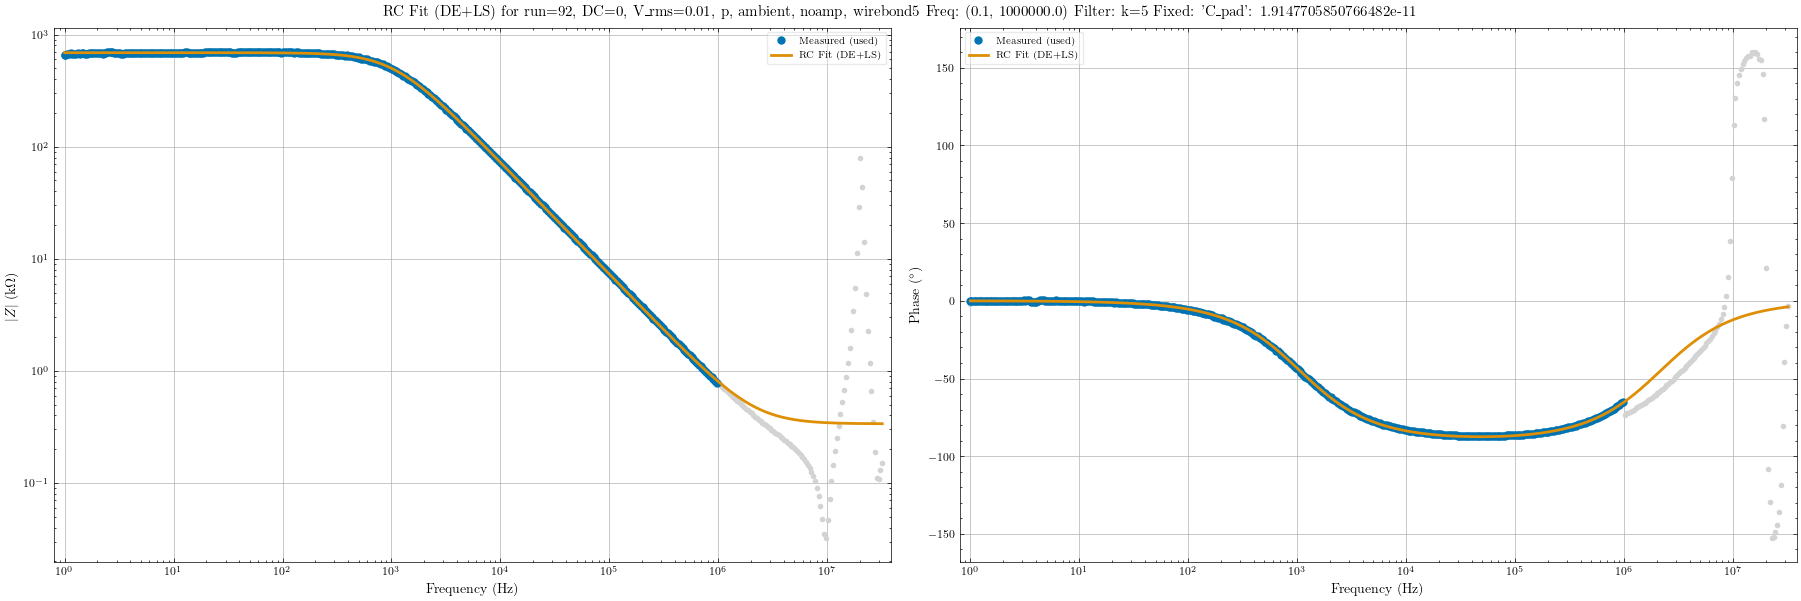


Final Fitted Parameters Dictionary:
{'C_pad': 1.9147705850766482e-11, 'R_mem1': np.float64(689491.9122085571), 'C_mem1': np.float64(1.9915590331990774e-10), 'R_series': np.float64(336.9945282131803)}
--- Fit finished for: run=92, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---

--- Starting Fit for: run=93, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': 1.9147705850766482e-11}
Frequency range: (0.1, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
260 pts post-freq filter.
Median filter k=5
Running DE...
DE OK.
 DE Final Cost: 4.6420e+02
  DE Best:)
name R_mem1: 3.97e+10
name C_mem1: 9.99e-10
name R_series: 4.68e+02

Running LS Refinement...
LS OK!
  LS Final Cost: 2.4239e+02
  Final Fitted Parameters:
    R_mem1: 1.5838e+07
    C_mem1: 8.9826e-10
    C_pad: 1.9148e-11
    R_series: 3.4826e+02


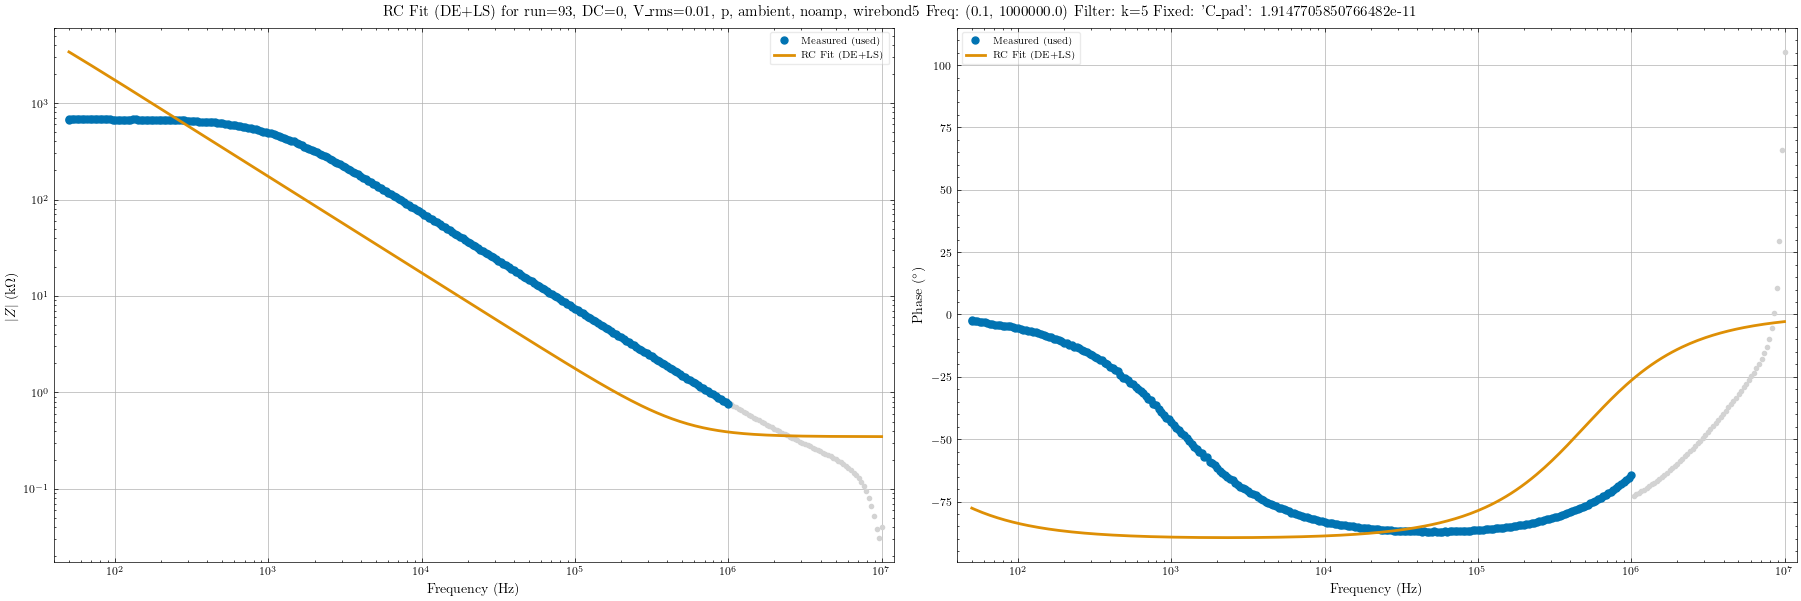


Final Fitted Parameters Dictionary:
{'C_pad': 1.9147705850766482e-11, 'R_mem1': np.float64(15837625.30222825), 'C_mem1': np.float64(8.982610202990917e-10), 'R_series': np.float64(348.2625344533343)}
--- Fit finished for: run=93, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---

--- Starting Fit for: run=95, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': 1.9147705850766482e-11}
Frequency range: (0.1, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
301 pts post-freq filter.
Median filter k=5
Running DE...
DE OK.
 DE Final Cost: 5.0129e+04
  DE Best:)
name R_mem1: 3.41e+10
name C_mem1: 1.00e-09
name R_series: 1.99e+02

Running LS Refinement...
LS OK!
  LS Final Cost: 2.0323e+00
  Final Fitted Parameters:
    R_mem1: 2.4674e+05
    C_mem1: 1.7159e-10
    C_pad: 1.9148e-11
    R_series: 2.4628e+02


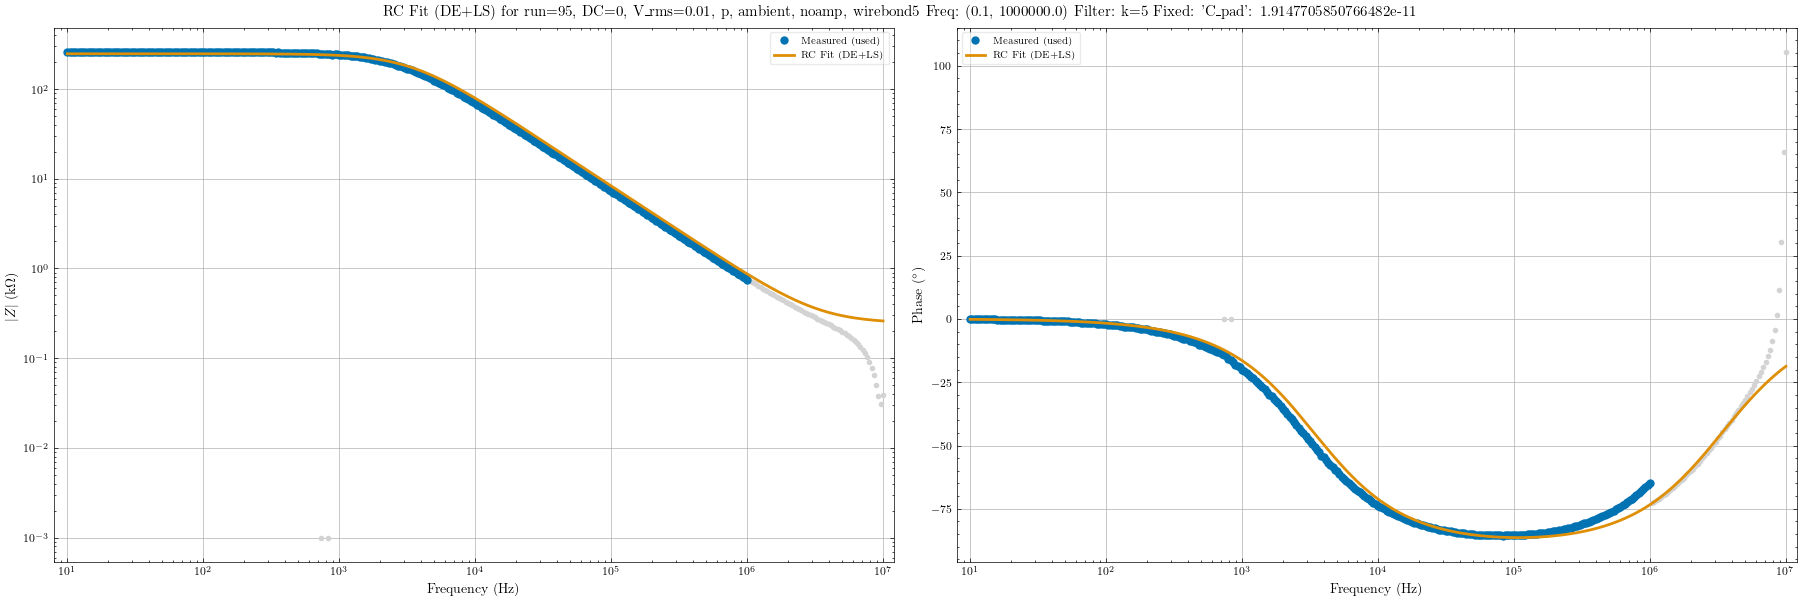


Final Fitted Parameters Dictionary:
{'C_pad': 1.9147705850766482e-11, 'R_mem1': np.float64(246736.0816900478), 'C_mem1': np.float64(1.7158605187544402e-10), 'R_series': np.float64(246.277322129487)}
--- Fit finished for: run=95, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---

--- Starting Fit for: run=98, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': 1.9147705850766482e-11}
Frequency range: (0.1, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
301 pts post-freq filter.
Median filter k=5
Running DE...
DE OK.
 DE Final Cost: 9.6134e+04
  DE Best:)
name R_mem1: 5.66e+10
name C_mem1: 1.00e-09
name R_series: 1.59e+03

Running LS Refinement...
LS OK!
  LS Final Cost: 1.5994e+00
  Final Fitted Parameters:
    R_mem1: 1.7593e+05
    C_mem1: 1.7489e-10
    C_pad: 1.9148e-11
    R_series: 2.2481e+02


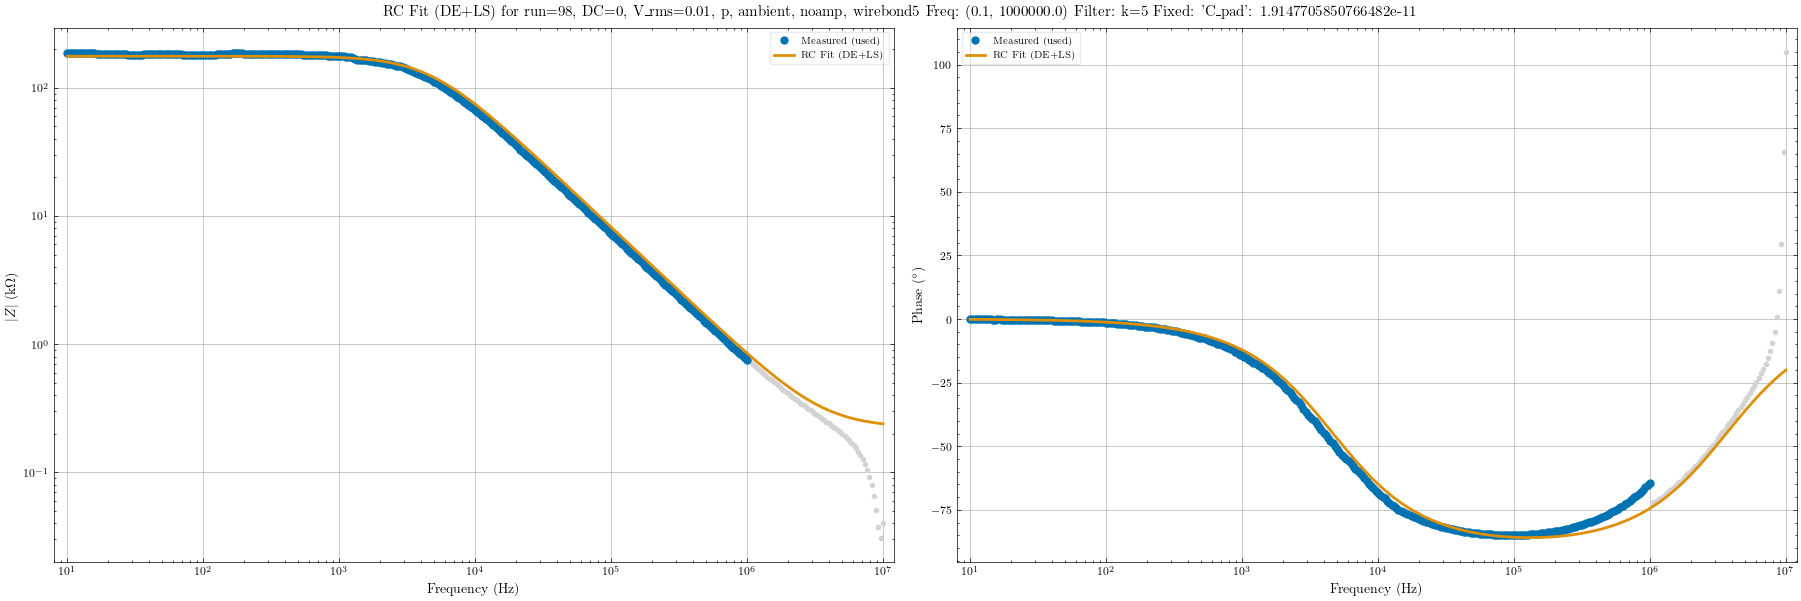


Final Fitted Parameters Dictionary:
{'C_pad': 1.9147705850766482e-11, 'R_mem1': np.float64(175934.86223025966), 'C_mem1': np.float64(1.74887585960783e-10), 'R_series': np.float64(224.81124654581745)}
--- Fit finished for: run=98, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---

--- Starting Fit for: run=74, DC=0, V_rms=0.04722223, p, vacuum, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': 1.9147705850766482e-11}
Frequency range: (0.1, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
420 pts post-freq filter.
Median filter k=5
Running DE...
DE OK.
 DE Final Cost: 5.1387e+00
  DE Best:)
name R_mem1: 1.02e+06
name C_mem1: 1.78e-10
name R_series: 1.51e+02

Running LS Refinement...
LS OK!
  LS Final Cost: 2.5694e+00
  Final Fitted Parameters:
    R_mem1: 1.0201e+06
    C_mem1: 1.7752e-10
    C_pad: 1.9148e-11
    R_series: 1.5078e+02


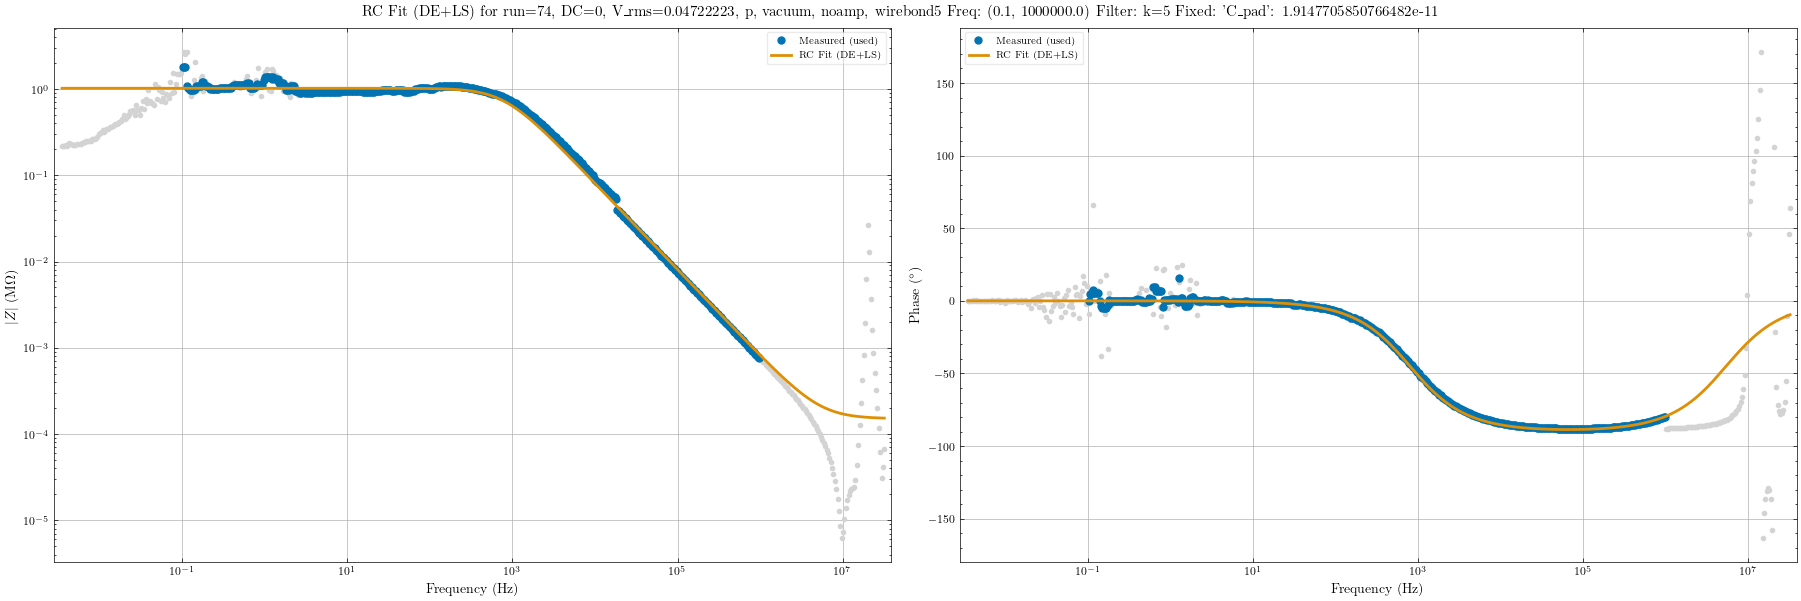


Final Fitted Parameters Dictionary:
{'C_pad': 1.9147705850766482e-11, 'R_mem1': np.float64(1020071.0436935425), 'C_mem1': np.float64(1.775215128316856e-10), 'R_series': np.float64(150.78070506263884)}
--- Fit finished for: run=74, DC=0, V_rms=0.04722223, p, vacuum, noamp, wirebond5 ---

--- Starting Fit for: run=76, DC=0, V_rms=0.04722223, p, vacuum, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': 1.9147705850766482e-11}
Frequency range: (0.1, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
420 pts post-freq filter.
Median filter k=5
Running DE...
DE OK.
 DE Final Cost: 4.1613e+02
  DE Best:)
name R_mem1: 1.65e+06
name C_mem1: 1.31e-12
name R_series: 1.03e+03

Running LS Refinement...
LS OK!
  LS Final Cost: 2.0789e+02
  Final Fitted Parameters:
    R_mem1: 1.3349e+06
    C_mem1: 1.0000e-13
    C_pad: 1.9148e-11
    R_series: 1.0000e+04


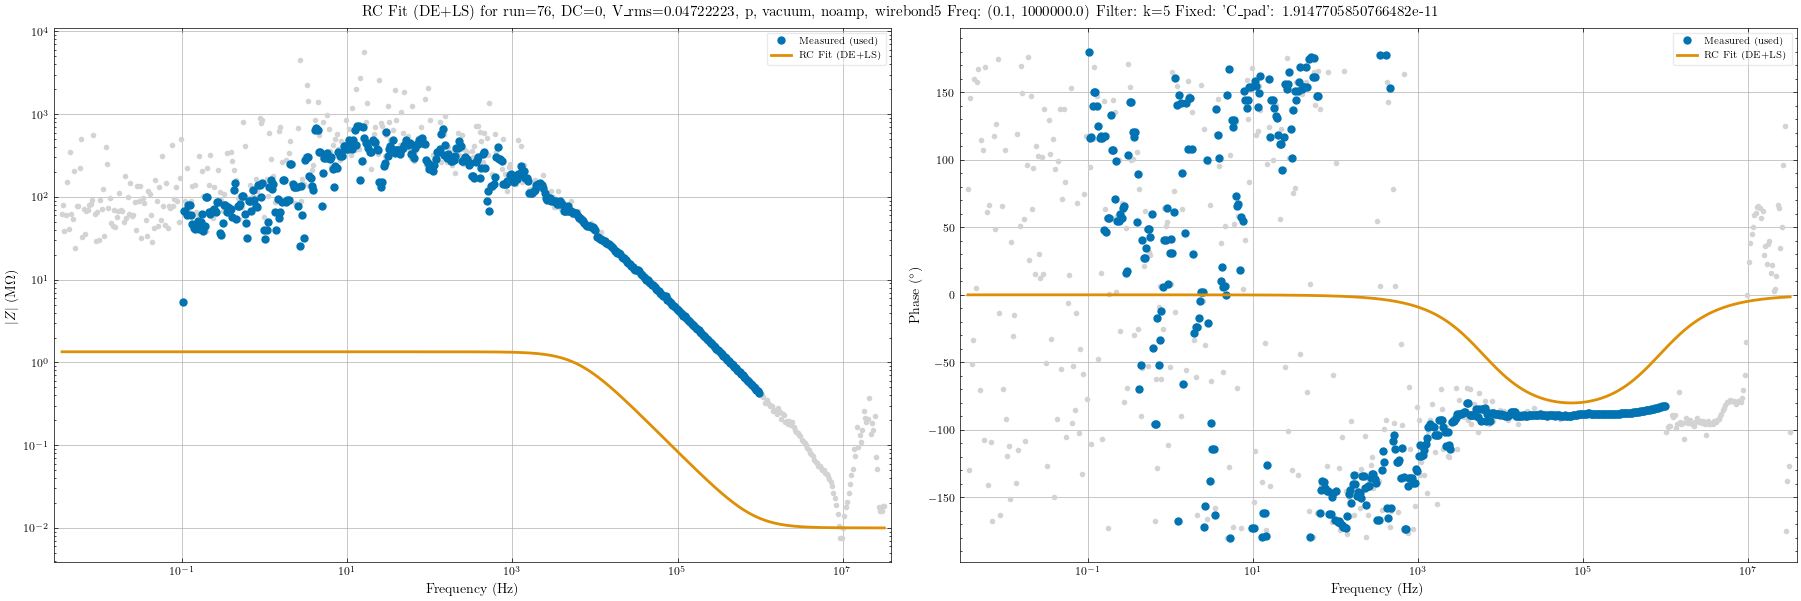


Final Fitted Parameters Dictionary:
{'C_pad': 1.9147705850766482e-11, 'R_mem1': np.float64(1334944.923355402), 'C_mem1': np.float64(1.0000000000000002e-13), 'R_series': np.float64(9999.999999999998)}
--- Fit finished for: run=76, DC=0, V_rms=0.04722223, p, vacuum, noamp, wirebond5 ---

--- Starting Fit for: run=78, DC=0, V_rms=0.04722223, p, vacuum, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': 1.9147705850766482e-11}
Frequency range: (0.1, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
420 pts post-freq filter.
Median filter k=5
Running DE...
DE OK.
 DE Final Cost: 7.2986e+00
  DE Best:)
name R_mem1: 2.17e+06
name C_mem1: 2.15e-11
name R_series: 9.98e+02

Running LS Refinement...
LS OK!
  LS Final Cost: 9.3901e+00
  Final Fitted Parameters:
    R_mem1: 2.1080e+06
    C_mem1: 1.2809e-11
    C_pad: 1.9148e-11
    R_series: 1.0708e+03


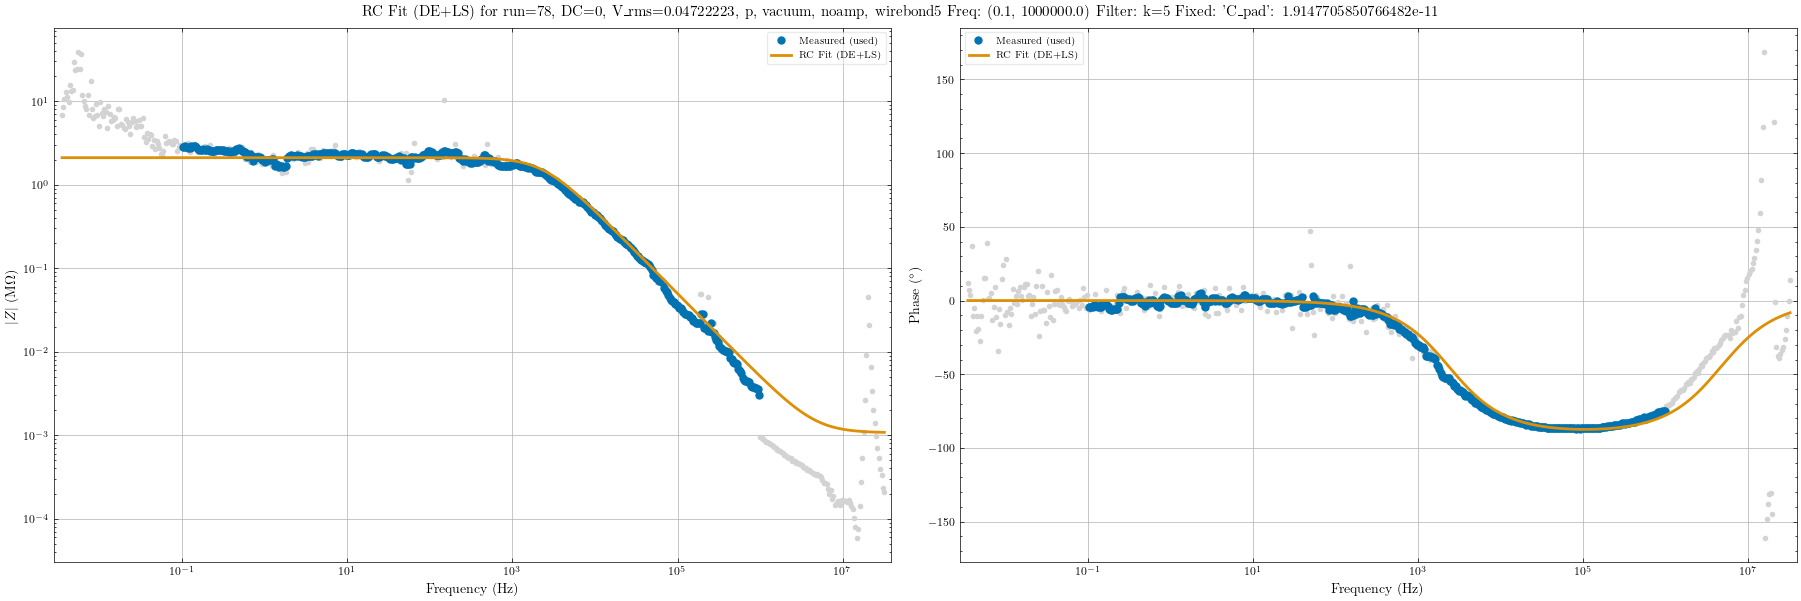


Final Fitted Parameters Dictionary:
{'C_pad': 1.9147705850766482e-11, 'R_mem1': np.float64(2108018.0608884348), 'C_mem1': np.float64(1.280855331552421e-11), 'R_series': np.float64(1070.7753730344652)}
--- Fit finished for: run=78, DC=0, V_rms=0.04722223, p, vacuum, noamp, wirebond5 ---

--- Starting Fit for: run=81, DC=0, V_rms=0.01, p, vacuum, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': 1.9147705850766482e-11}
Frequency range: (0.1, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
361 pts post-freq filter.
Median filter k=5
Running DE...
DE OK.
 DE Final Cost: 2.1890e-01
  DE Best:)
name R_mem1: 1.36e+06
name C_mem1: 1.90e-10
name R_series: 3.02e+02

Running LS Refinement...
LS OK!
  LS Final Cost: 1.0945e-01
  Final Fitted Parameters:
    R_mem1: 1.3584e+06
    C_mem1: 1.9046e-10
    C_pad: 1.9148e-11
    R_series: 3.0227e+02


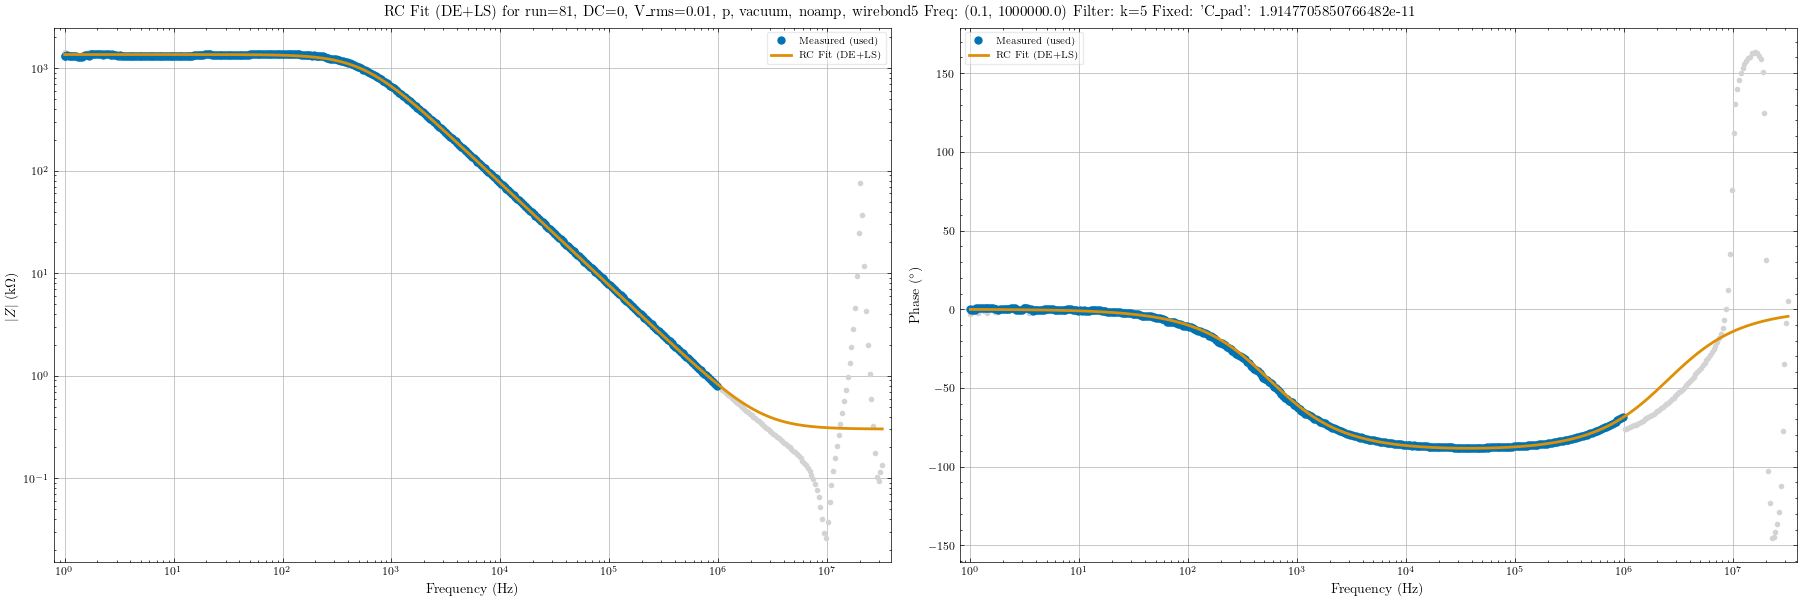


Final Fitted Parameters Dictionary:
{'C_pad': 1.9147705850766482e-11, 'R_mem1': np.float64(1358377.0207901), 'C_mem1': np.float64(1.9046449663303594e-10), 'R_series': np.float64(302.2665698218916)}
--- Fit finished for: run=81, DC=0, V_rms=0.01, p, vacuum, noamp, wirebond5 ---

--- Starting Fit for: run=83, DC=0, V_rms=0.01, p, vacuum, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': 1.9147705850766482e-11}
Frequency range: (0.1, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
361 pts post-freq filter.
Median filter k=5
Running DE...
DE OK.
 DE Final Cost: 1.7875e+05
  DE Best:)
name R_mem1: 7.36e+10
name C_mem1: 1.00e-09
name R_series: 1.18e+02

Running LS Refinement...
LS OK!
  LS Final Cost: 3.7051e+00
  Final Fitted Parameters:
    R_mem1: 1.3743e+06
    C_mem1: 1.5743e-10
    C_pad: 1.9148e-11
    R_series: 1.8632e+02


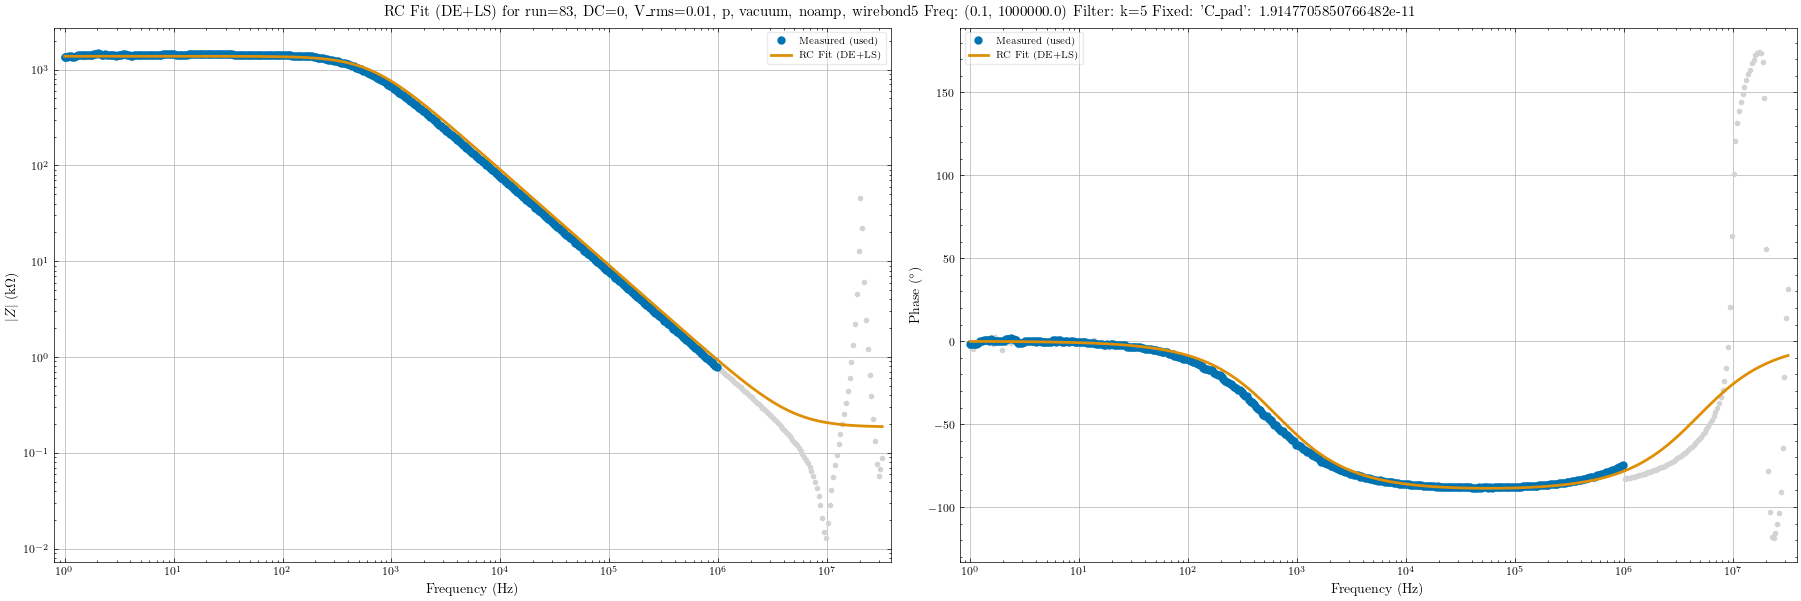


Final Fitted Parameters Dictionary:
{'C_pad': 1.9147705850766482e-11, 'R_mem1': np.float64(1374291.3816338151), 'C_mem1': np.float64(1.5743471608457472e-10), 'R_series': np.float64(186.3240061527154)}
--- Fit finished for: run=83, DC=0, V_rms=0.01, p, vacuum, noamp, wirebond5 ---

--- Starting Fit for: run=85, DC=0, V_rms=0.01, p, vacuum, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': 1.9147705850766482e-11}
Frequency range: (0.1, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
361 pts post-freq filter.
Median filter k=5
Running DE...
DE OK.
 DE Final Cost: 5.5330e-02
  DE Best:)
name R_mem1: 1.00e+06
name C_mem1: 1.94e-10
name R_series: 2.11e+02

Running LS Refinement...
LS OK!
  LS Final Cost: 2.7665e-02
  Final Fitted Parameters:
    R_mem1: 1.0028e+06
    C_mem1: 1.9422e-10
    C_pad: 1.9148e-11
    R_series: 2.1085e+02


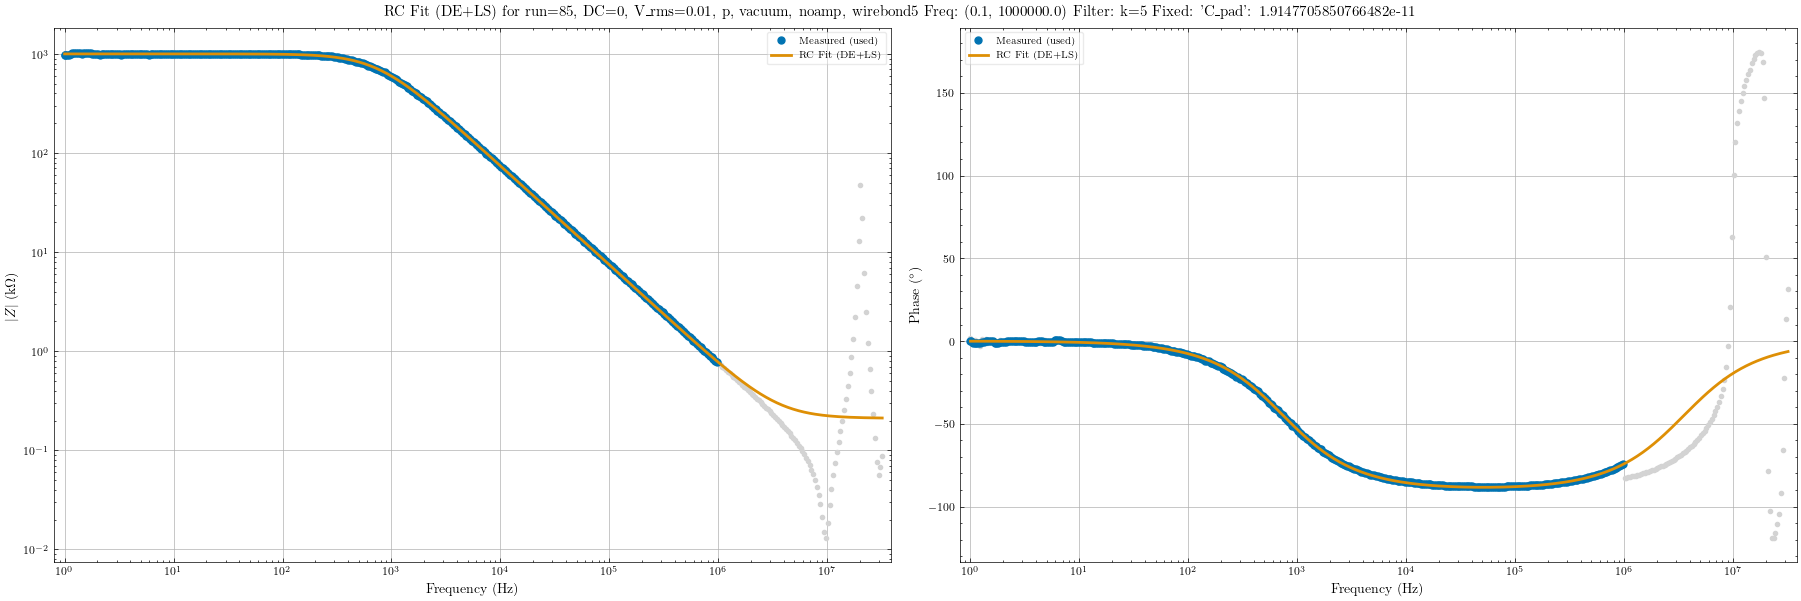


Final Fitted Parameters Dictionary:
{'C_pad': 1.9147705850766482e-11, 'R_mem1': np.float64(1002759.8848266602), 'C_mem1': np.float64(1.9422023626177974e-10), 'R_series': np.float64(210.8498290175594)}
--- Fit finished for: run=85, DC=0, V_rms=0.01, p, vacuum, noamp, wirebond5 ---

--- Starting Fit for: run=86, DC=0, V_rms=0.01, p, vacuum, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': 1.9147705850766482e-11}
Frequency range: (0.1, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
361 pts post-freq filter.
Median filter k=5
Running DE...
DE OK.
 DE Final Cost: 6.8624e-02
  DE Best:)
name R_mem1: 9.91e+05
name C_mem1: 1.94e-10
name R_series: 2.13e+02

Running LS Refinement...
LS OK!
  LS Final Cost: 3.4308e-02
  Final Fitted Parameters:
    R_mem1: 9.9147e+05
    C_mem1: 1.9433e-10
    C_pad: 1.9148e-11
    R_series: 2.1190e+02


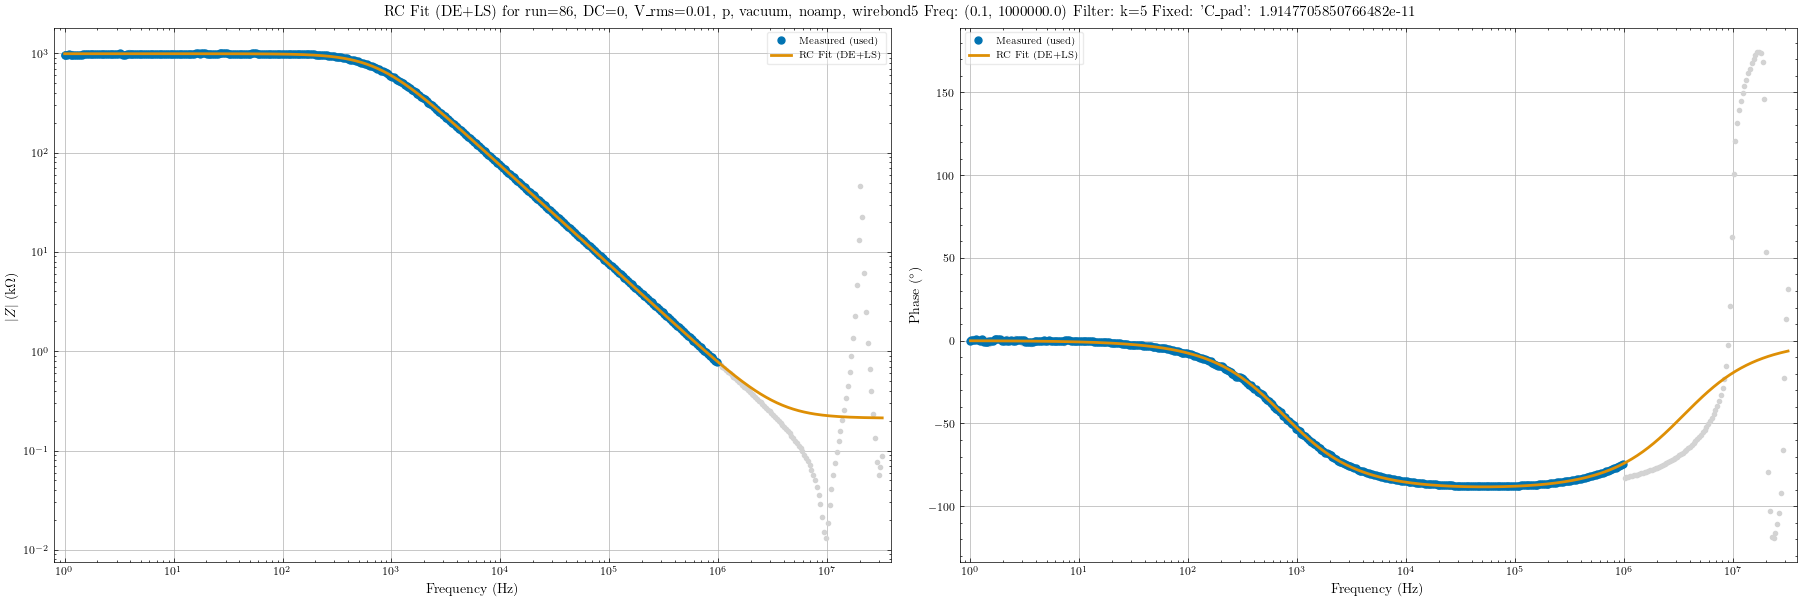


Final Fitted Parameters Dictionary:
{'C_pad': 1.9147705850766482e-11, 'R_mem1': np.float64(991472.4429851187), 'C_mem1': np.float64(1.9432660434616022e-10), 'R_series': np.float64(211.90494699936966)}
--- Fit finished for: run=86, DC=0, V_rms=0.01, p, vacuum, noamp, wirebond5 ---

--- Starting Fit for: run=87, DC=0, V_rms=0.01, p, vacuum, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': 1.9147705850766482e-11}
Frequency range: (0.1, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
361 pts post-freq filter.
Median filter k=5
Running DE...
DE OK.
 DE Final Cost: 5.0586e-02
  DE Best:)
name R_mem1: 9.58e+05
name C_mem1: 1.94e-10
name R_series: 2.12e+02

Running LS Refinement...
LS OK!
  LS Final Cost: 2.5293e-02
  Final Fitted Parameters:
    R_mem1: 9.5797e+05
    C_mem1: 1.9419e-10
    C_pad: 1.9148e-11
    R_series: 2.1164e+02


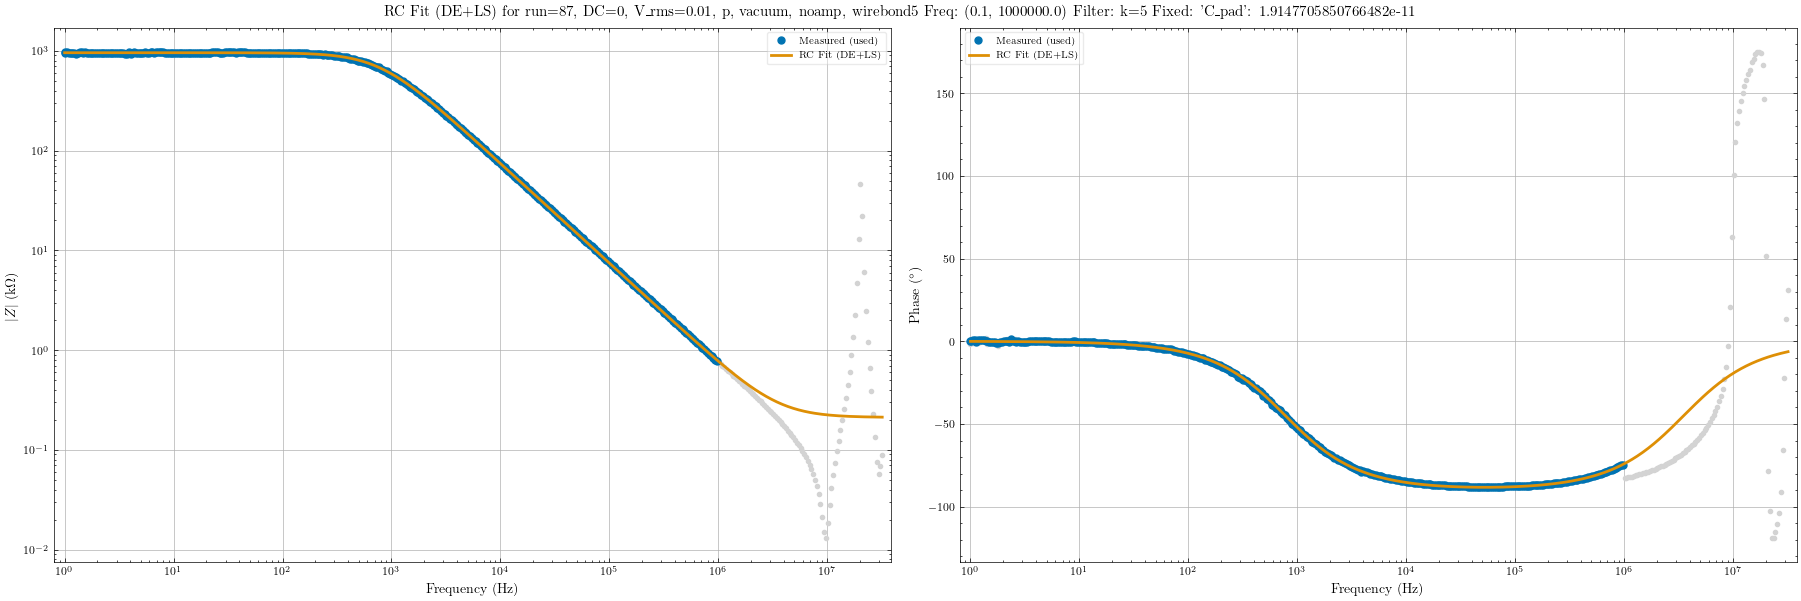


Final Fitted Parameters Dictionary:
{'C_pad': 1.9147705850766482e-11, 'R_mem1': np.float64(957968.5337677002), 'C_mem1': np.float64(1.9419477009435047e-10), 'R_series': np.float64(211.642015022765)}
--- Fit finished for: run=87, DC=0, V_rms=0.01, p, vacuum, noamp, wirebond5 ---

--- Starting Fit for: run=88, DC=0, V_rms=0.01, p, vacuum, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': 1.9147705850766482e-11}
Frequency range: (0.1, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
361 pts post-freq filter.
Median filter k=5
Running DE...
DE OK.
 DE Final Cost: 5.4223e-02
  DE Best:)
name R_mem1: 9.08e+05
name C_mem1: 1.94e-10
name R_series: 2.12e+02

Running LS Refinement...
LS OK!
  LS Final Cost: 2.7111e-02
  Final Fitted Parameters:
    R_mem1: 9.0824e+05
    C_mem1: 1.9423e-10
    C_pad: 1.9148e-11
    R_series: 2.1226e+02


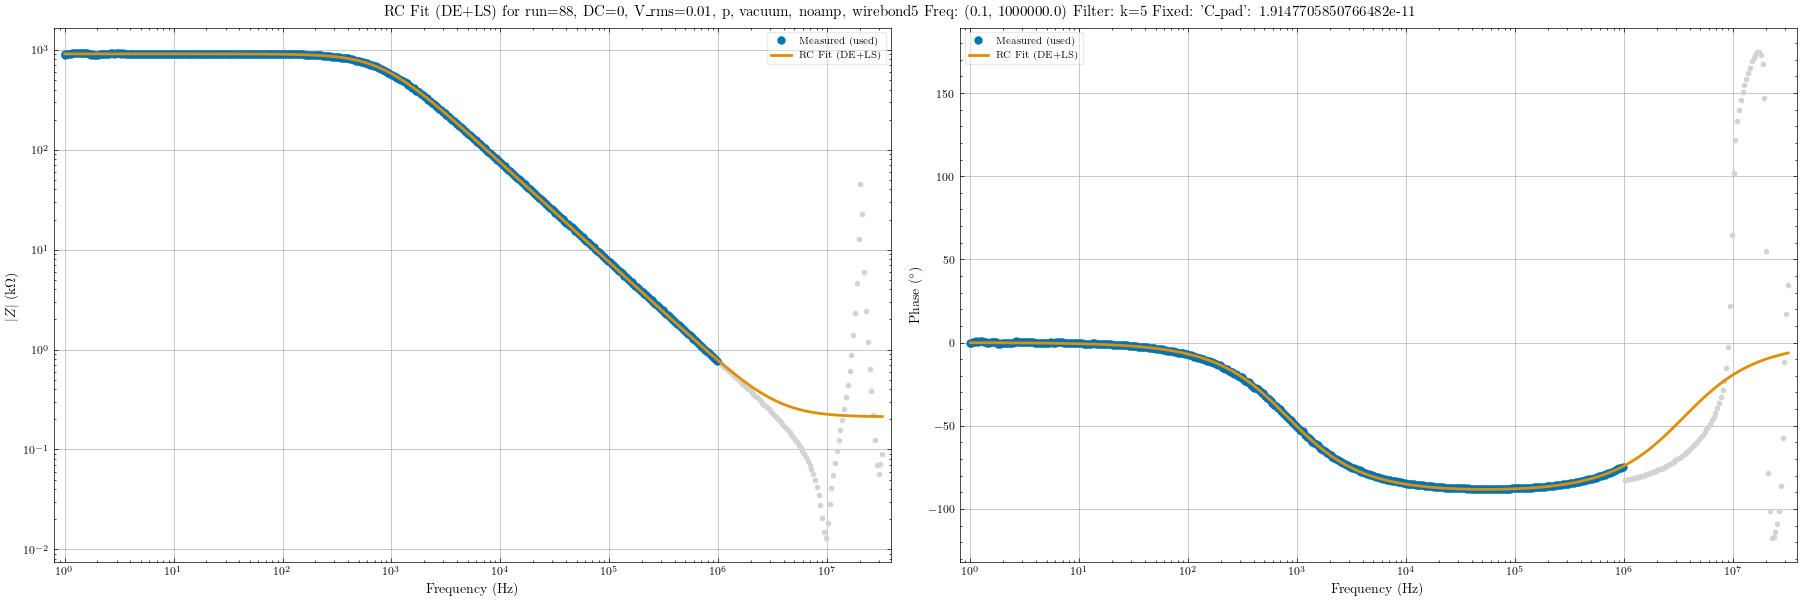


Final Fitted Parameters Dictionary:
{'C_pad': 1.9147705850766482e-11, 'R_mem1': np.float64(908236.8027114868), 'C_mem1': np.float64(1.9423140573249926e-10), 'R_series': np.float64(212.2583553460663)}
--- Fit finished for: run=88, DC=0, V_rms=0.01, p, vacuum, noamp, wirebond5 ---

--- Starting Fit for: run=89, DC=0, V_rms=0.01, p, vacuum, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': 1.9147705850766482e-11}
Frequency range: (0.1, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
361 pts post-freq filter.
Median filter k=5
Running DE...
DE OK.
 DE Final Cost: 5.0855e-02
  DE Best:)
name R_mem1: 8.53e+05
name C_mem1: 1.94e-10
name R_series: 2.10e+02

Running LS Refinement...
LS OK!
  LS Final Cost: 2.5427e-02
  Final Fitted Parameters:
    R_mem1: 8.5310e+05
    C_mem1: 1.9430e-10
    C_pad: 1.9148e-11
    R_series: 2.1021e+02


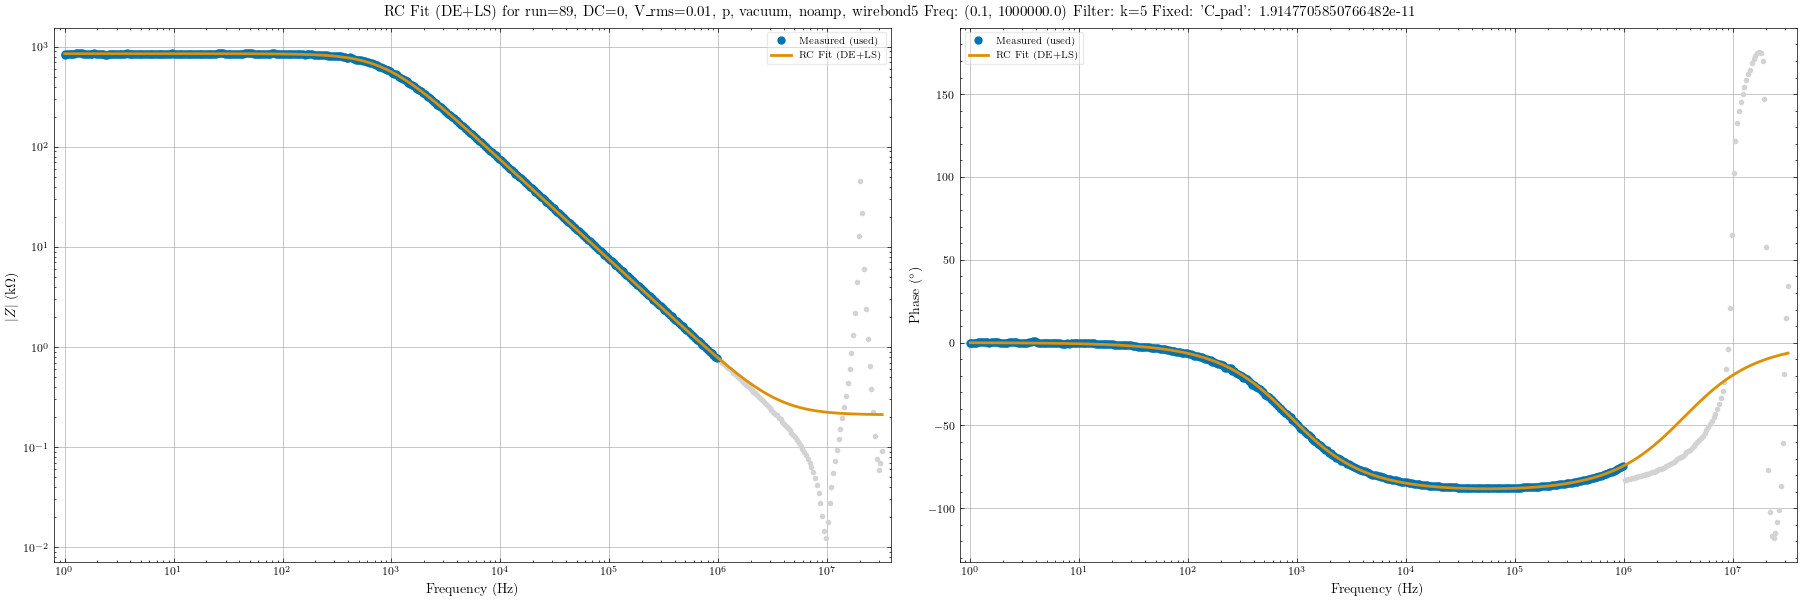


Final Fitted Parameters Dictionary:
{'C_pad': 1.9147705850766482e-11, 'R_mem1': np.float64(853097.5910339355), 'C_mem1': np.float64(1.943009509612583e-10), 'R_series': np.float64(210.20821834930575)}
--- Fit finished for: run=89, DC=0, V_rms=0.01, p, vacuum, noamp, wirebond5 ---

--- Starting Fit for: run=90, DC=0, V_rms=0.01, p, vacuum, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': 1.9147705850766482e-11}
Frequency range: (0.1, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
361 pts post-freq filter.
Median filter k=5
Running DE...
DE OK.
 DE Final Cost: 4.3901e-02
  DE Best:)
name R_mem1: 8.03e+05
name C_mem1: 1.94e-10
name R_series: 2.11e+02

Running LS Refinement...
LS OK!
  LS Final Cost: 2.1950e-02
  Final Fitted Parameters:
    R_mem1: 8.0281e+05
    C_mem1: 1.9434e-10
    C_pad: 1.9148e-11
    R_series: 2.1066e+02


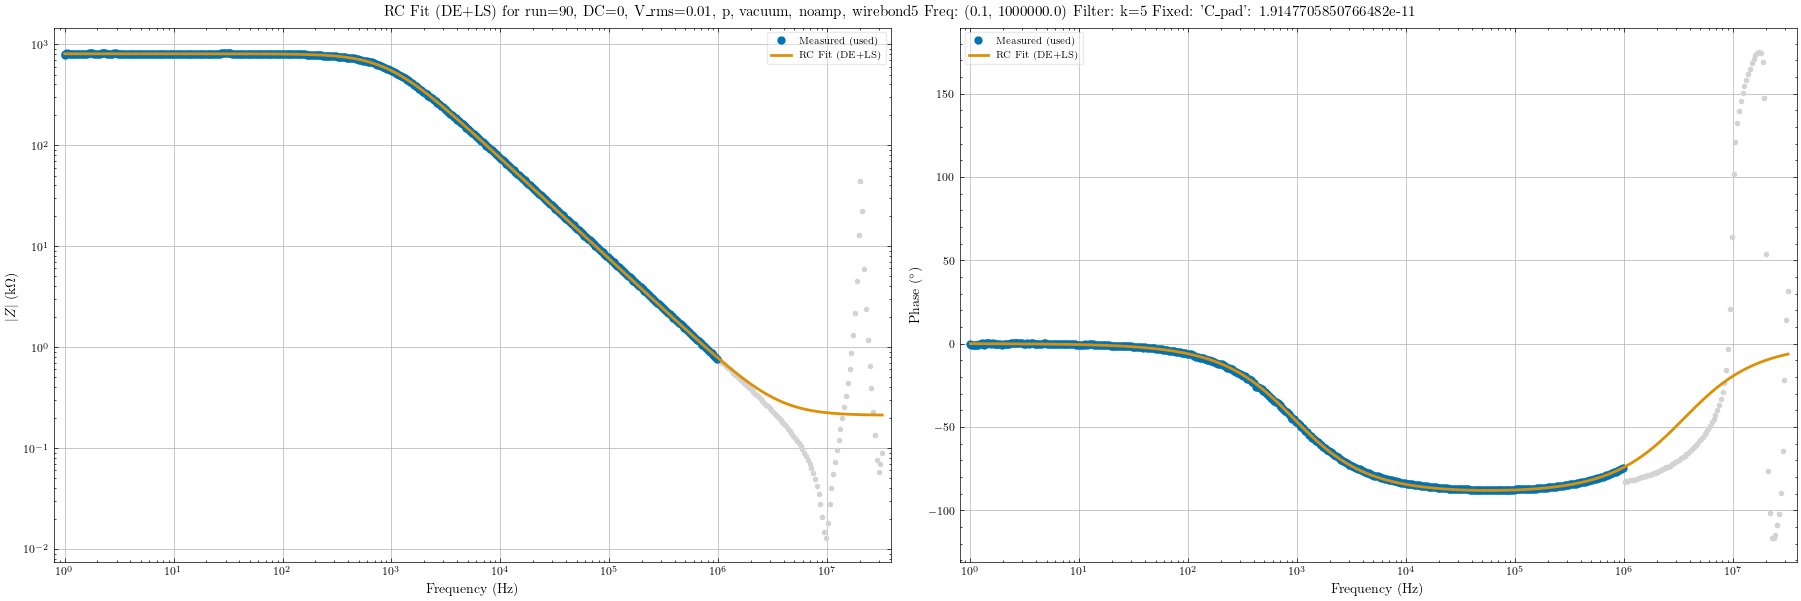


Final Fitted Parameters Dictionary:
{'C_pad': 1.9147705850766482e-11, 'R_mem1': np.float64(802814.341835022), 'C_mem1': np.float64(1.9434316316051225e-10), 'R_series': np.float64(210.664598730923)}
--- Fit finished for: run=90, DC=0, V_rms=0.01, p, vacuum, noamp, wirebond5 ---

--- Starting Fit for: run=94, DC=0, V_rms=0.01, p, vacuum, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': 1.9147705850766482e-11}
Frequency range: (0.1, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
301 pts post-freq filter.
Median filter k=5
Running DE...
DE OK.
 DE Final Cost: 3.2281e-02
  DE Best:)
name R_mem1: 3.26e+05
name C_mem1: 2.00e-10
name R_series: 3.40e+02

Running LS Refinement...
LS OK!
  LS Final Cost: 1.6141e-02
  Final Fitted Parameters:
    R_mem1: 3.2573e+05
    C_mem1: 1.9986e-10
    C_pad: 1.9148e-11
    R_series: 3.3969e+02


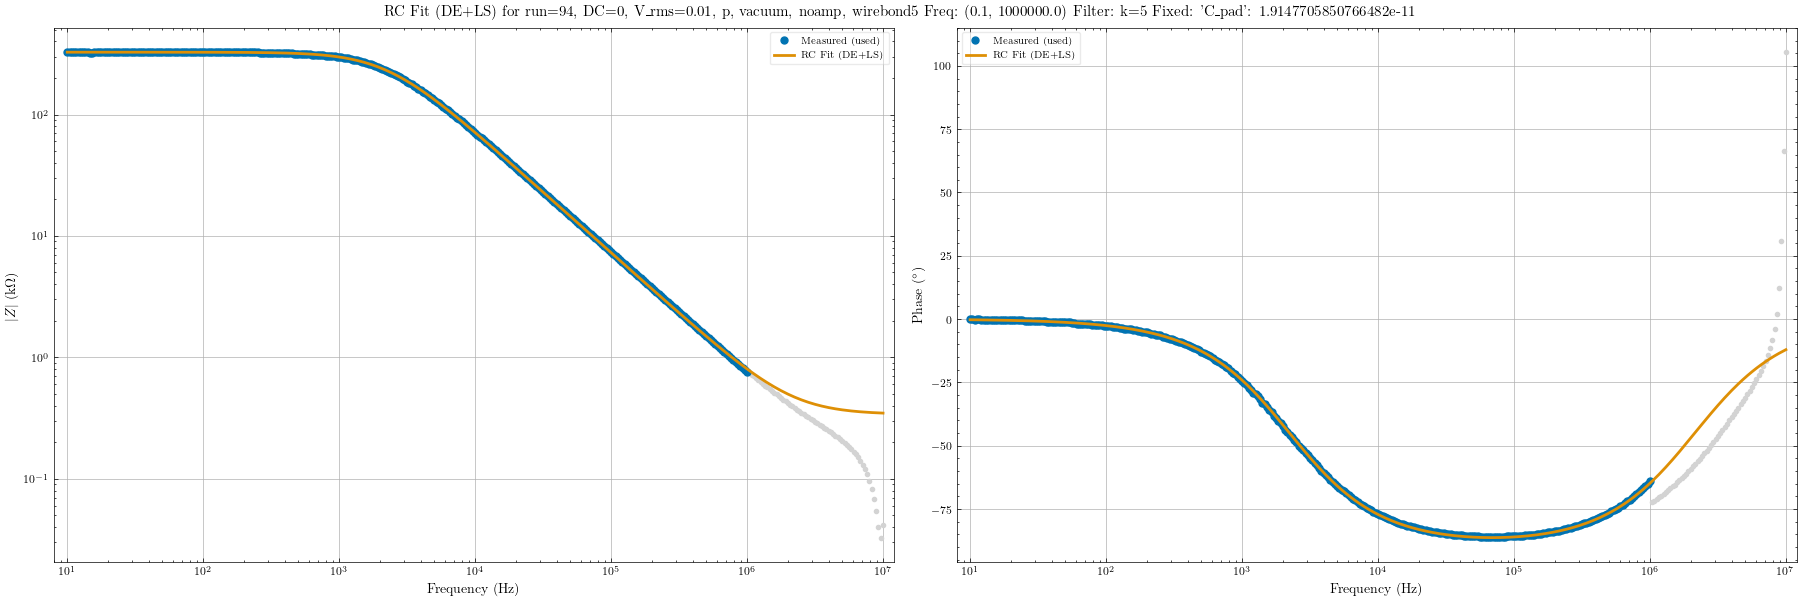


Final Fitted Parameters Dictionary:
{'C_pad': 1.9147705850766482e-11, 'R_mem1': np.float64(325726.9228210449), 'C_mem1': np.float64(1.9986281076983753e-10), 'R_series': np.float64(339.6907249198566)}
--- Fit finished for: run=94, DC=0, V_rms=0.01, p, vacuum, noamp, wirebond5 ---

--- Starting Fit for: run=96, DC=0, V_rms=0.01, p, vacuum, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': 1.9147705850766482e-11}
Frequency range: (0.1, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
301 pts post-freq filter.
Median filter k=5
Running DE...
DE OK.
 DE Final Cost: 2.6863e+04
  DE Best:)
name R_mem1: 4.97e+10
name C_mem1: 1.00e-09
name R_series: 5.22e+02

Running LS Refinement...
LS OK!
  LS Final Cost: 2.0987e+00
  Final Fitted Parameters:
    R_mem1: 3.3571e+05
    C_mem1: 1.7150e-10
    C_pad: 1.9148e-11
    R_series: 2.6910e+02


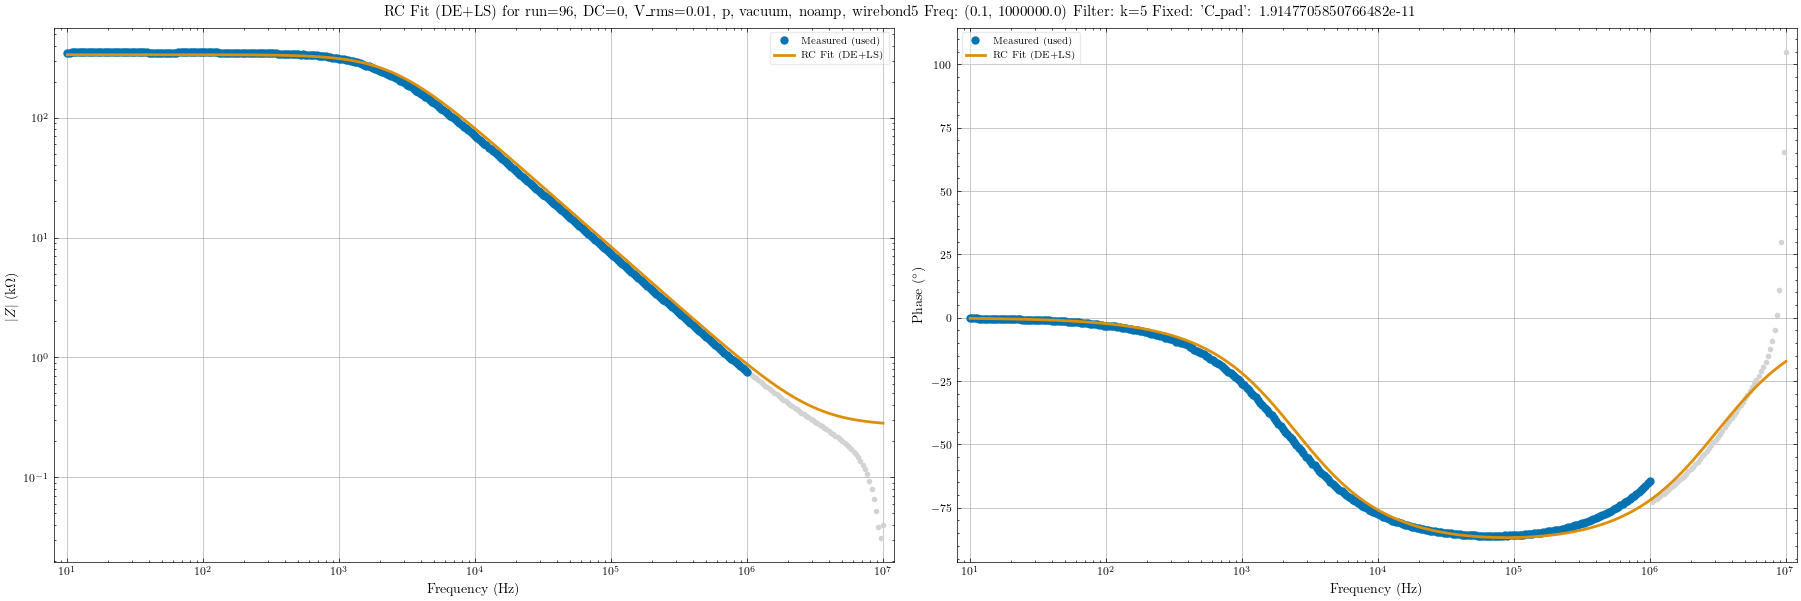


Final Fitted Parameters Dictionary:
{'C_pad': 1.9147705850766482e-11, 'R_mem1': np.float64(335712.314540655), 'C_mem1': np.float64(1.7149900026158705e-10), 'R_series': np.float64(269.1032236365719)}
--- Fit finished for: run=96, DC=0, V_rms=0.01, p, vacuum, noamp, wirebond5 ---

--- Starting Fit for: run=97, DC=0, V_rms=0.01, p, vacuum, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': 1.9147705850766482e-11}
Frequency range: (0.1, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
301 pts post-freq filter.
Median filter k=5
Running DE...
DE OK.
 DE Final Cost: 2.9979e+04
  DE Best:)
name R_mem1: 9.20e+10
name C_mem1: 1.00e-09
name R_series: 2.91e+02

Running LS Refinement...
LS OK!
  LS Final Cost: 3.5452e-01
  Final Fitted Parameters:
    R_mem1: 3.2020e+05
    C_mem1: 2.1227e-10
    C_pad: 1.9148e-11
    R_series: 2.9151e+02


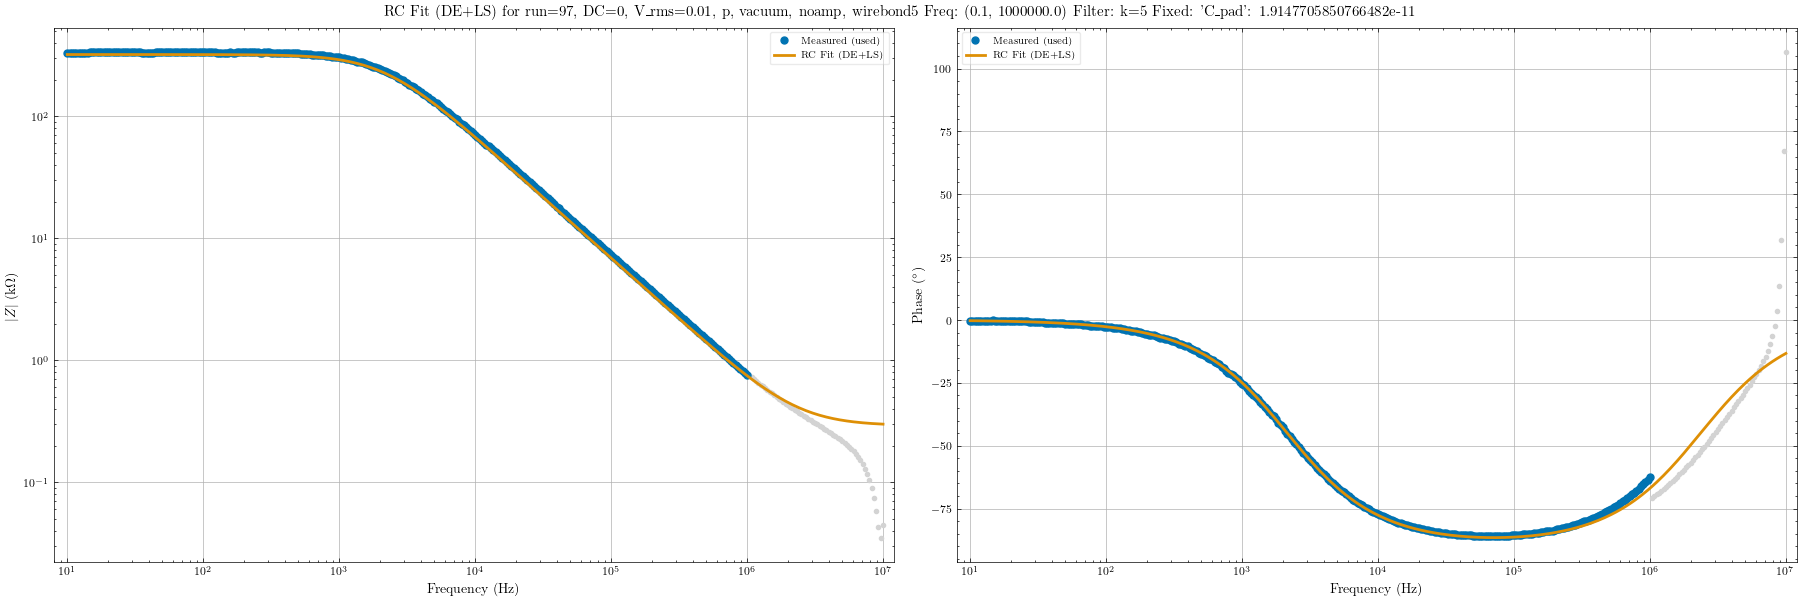


Final Fitted Parameters Dictionary:
{'C_pad': 1.9147705850766482e-11, 'R_mem1': np.float64(320201.61848445184), 'C_mem1': np.float64(2.1227487756008303e-10), 'R_series': np.float64(291.5108266782463)}
--- Fit finished for: run=97, DC=0, V_rms=0.01, p, vacuum, noamp, wirebond5 ---


In [25]:
# ------------------------------ Fitting ------------------------------

# --- Settings ---
fit_settings = {
    'model_type': 'RC', # String: 'RC', 'CPE', 'RC2','CPE2, 'RC3', 'CPE3'
    'freq_bounds': (1e-1, 1e6), # Tuple (min_freq, max_freq) for fitting range. None means no limit.
    'med_filt': 5, # Median filter kernel (or 0/None to skip)
    'fixed_params': {'C_pad': C_calc_pad}, #{'R_mem1': np.float64(254647.25), 'C_mem1': np.float64(1.9379283048750973e-10), 'C_pad': np.float64(1.8206090757078506e-11), 'R_series': np.float64(150.64021259132736)},#None, # Dictionary mapping parameter names (str) to fixed values.
                            # {'C_pad': 1.5e-11}, # Fix C_pad (or None to fit all)
                            #  {'C_pad': 1.2e-11, 'R_mem': 1e8} # Fix two parameters (for RC model)
    
    'use_de': True,  # If True, perform Differential Evolution before Least Squares IF False to use only Least Squares (requires good initial guess).
    'plot_fit': True, # If True, display the Bode plot of the fit after completion.
    'fig_size': fig_size, # Figure size for the plot (None to use default).
    'plot_type': 'Zabsphi', # Plot type: 'Zrealimag' or 'Zabsphi'
    # Optional: Provide specific bounds/guesses if needed - set to None to use defaults.
    'de_bounds_dict': { 'C_mem1': (1e-13, 1e-9),'R_mem2': (1e1, 1e14), 'C_mem2': (C_calc_siox*0.5, C_calc_siox*1.5),
                     'C_pad': (1e-11, 3e-11), 'R_series': (1, 1e4), 'Q1': (1e-12, 1e-7), 'alpha1': (0.6, 1.0),
                      'Q2': (1e-13, 1e-8), 'alpha2': (0.5, 1.0)}, #'R_mem1': (1e1, 1e14),
    #'ls_bounds_dict': {'R_mem1': (1e-3, np.inf), 'C_mem1': (0, np.inf), 'R_mem2': (1e-3, np.inf), 
                        # 'C_mem2': (0, np.inf), 'C_pad': (0, np.inf), 'R_series': (0, np.inf), 'Q1': (1e-15, np.inf), 
                        # 'alpha1': (1e-3, 1.0), 'Q2': (1e-15, np.inf), 'alpha2': (1e-3, 1.0)}
                        
    # 'initial_guess_dict': {'R_mem1': 5e7, 'C_mem1': 5e-11, 'R_mem2': 1e5, 'C_mem2': 1e-9, 'C_pad': 2e-11, 'R_series': 70.0,
                             # 'Q1': 4e-11, 'alpha1': 0.92, 'Q2': 5e-10, 'alpha2': 0.85}
    'de_maxiter': 6000000, # Max generations (iterations) for Differential Evolution. Increase for complex problems.
    'ls_max_nfev': 300000 # Max function evaluations for Least Squares. Increase if refinement terminates early.
}

# Set the bounds for the Least Squares fit to be the same as the Differential Evolution bounds
fit_settings['ls_bounds_dict'] = fit_settings['de_bounds_dict']

# --- Select Data ---
# Select data 
data_to_fit  = [ solatron[73][0], solatron[75][0], solatron[77][0], solatron[80][0], solatron[82][0], solatron[84][0], solatron[91][0], solatron[92][0], solatron[93][0], solatron[95][0], solatron[98][0], solatron[74][0], solatron[76][0],solatron[78][0], solatron[81][0], solatron[83][0], solatron[85][0], solatron[86][0], solatron[87][0], solatron[88][0], solatron[89][0], solatron[90][0], solatron[94][0], solatron[96][0], solatron[97][0] ] #
#[solatron[73][0], solatron[75][0], solatron[77][0], solatron[80][0], solatron[82][0], solatron[84][0], solatron[91][0], solatron[92][0], solatron[93][0], solatron[95][0], solatron[98][0] ]

# extract a single DC level from the data
#dfit = extract_single_dc(dfit, DC_val=0)

for dat in data_to_fit:
    # --- Run Fit ---
    fig, ax = fit_impedance_data(dat, **fit_settings)




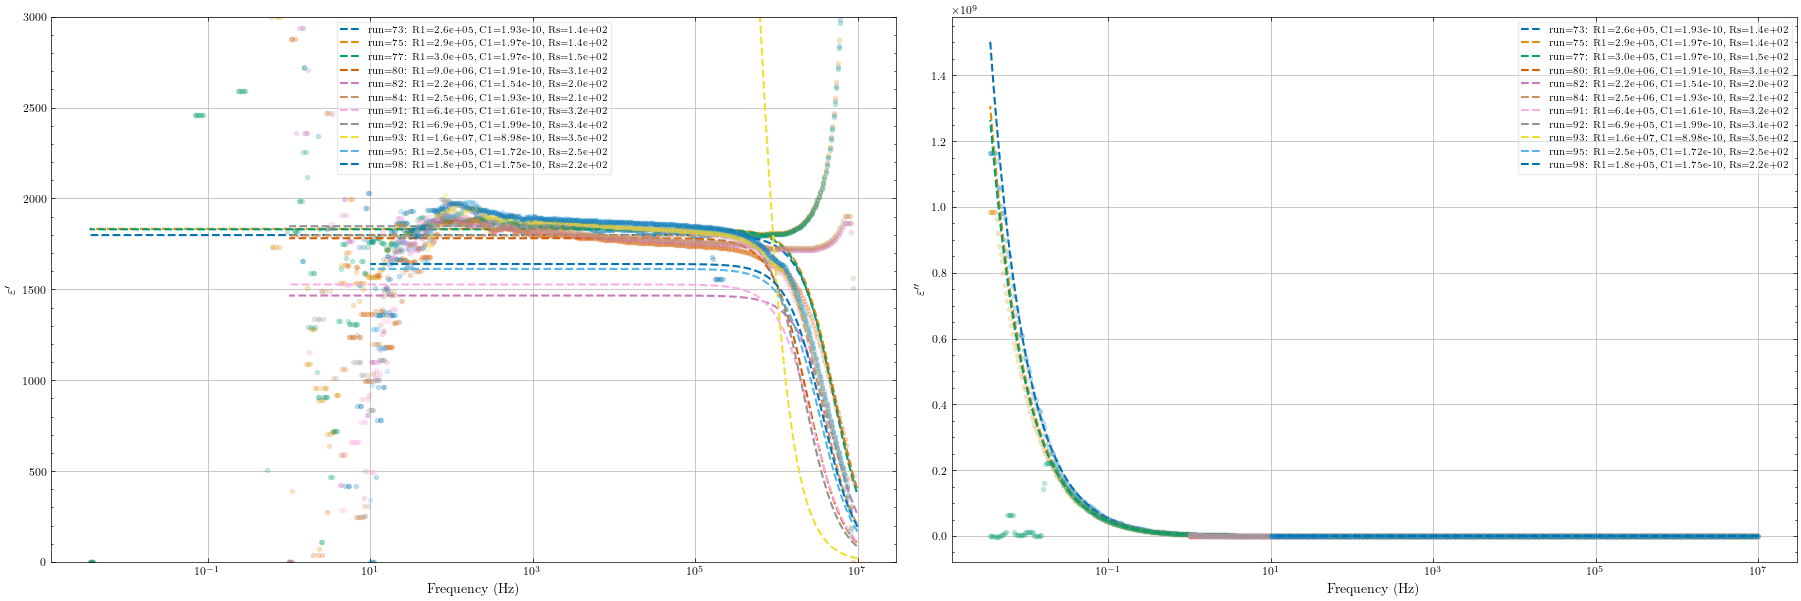

In [32]:
# ---------------------------------------- Plotting the Fitting ------------------------------
# Select data 
d69 = [solatron[73][0], solatron[75][0], solatron[77][0], solatron[80][0], solatron[82][0], solatron[84][0], solatron[91][0], solatron[92][0], solatron[93][0], solatron[95][0], solatron[98][0] ]

# Labels
plot_labels = ['wb6, pristine, ambient', 'wb6, eformed, ambient '] # label for the legend
plot_filename = 'wb6_pristine_vs_forming' # name for exported figure
plot_title = 'Electroforming vs Pristine' # title for powerpoint

# Notes
notes = [''] # notes for the powerpoint in text box

# if export true, update the plot string
d69 = update_plot_string(d69, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot_fit(d69, d_type='permittivity', freq_lim=[1e-3, 1e7], y_lim_left=[0,3000],
                    sort_data=False,  fig_size=fig_size, med_filt = 9, show_key = True)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 

/Users/horatiocox/Desktop/IS_Analysis/ISvenv/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/horatiocox/Desktop/IS_Analysis/ISvenv/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


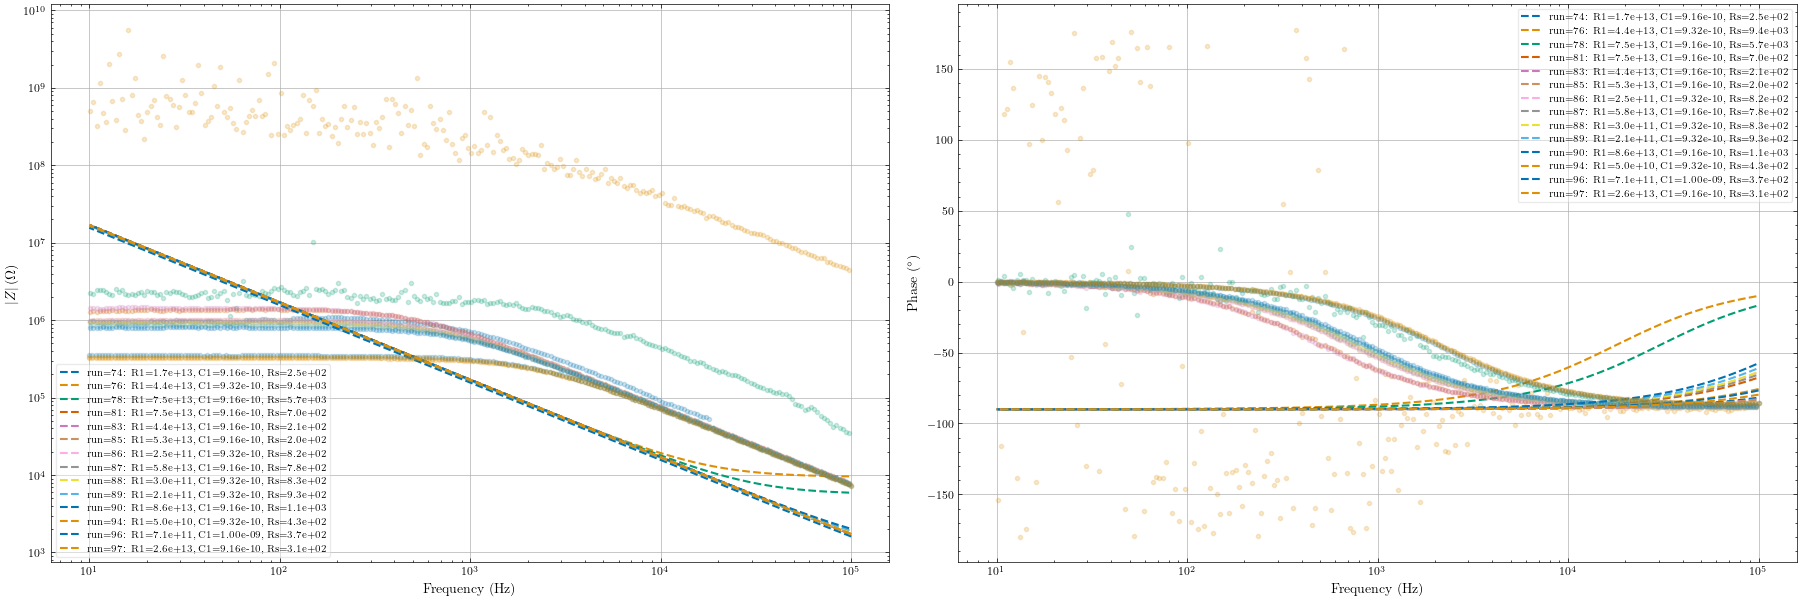

In [18]:
# ---------------------------------------- Plotting the Fitting ------------------------------
# Select data 
d69 = [solatron[74][0], solatron[76][0],solatron[78][0], solatron[81][0], solatron[83][0], solatron[85][0], solatron[86][0], solatron[87][0], solatron[88][0], solatron[89][0], solatron[90][0], solatron[94][0], solatron[96][0], solatron[97][0]]
# Labels
plot_labels = ['wb6, pristine, ambient', 'wb6, eformed, ambient '] # label for the legend
plot_filename = 'wb6_pristine_vs_forming' # name for exported figure
plot_title = 'Electroforming vs Pristine' # title for powerpoint

# Notes
notes = [''] # notes for the powerpoint in text box

# if export true, update the plot string
d69 = update_plot_string(d69, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot_fit(d69, d_type='Zabsphi', freq_lim=[1e1, 1e5], y_lim_right=None,
                    sort_data=False,  fig_size=fig_size, med_filt = 1, show_key = True)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 



# Exporting

### Exporting All Figures as Individual Files

In [19]:
if export_data:
    for fig_obj, fig_name, fig_title, notes in fig_list:
        save_path = Path(output_IS_solatron) / Path(f"{fig_name}_{powerpoint_string}.{fig_format}")
        fig_obj.savefig(save_path, dpi=600, bbox_inches='tight', transparent=plot_transparency)

### Exporting to Powerpoint

In [20]:
if export_data == True:
    # Create a PowerPoint presentation object
    prs = Presentation()

   

    # define the path to the output directory
    path_out = output_IS_solatron

    # Add each figure to the PowerPoint presentation if it exists
    for fig, fig_name, title, notes in fig_list:
        add_slide(fig, title, notes, prs, path_out = path_out)

    # Save the PowerPoint presentation
    prs.save(Path(path_out) / Path(f'{powerpoint_string}.pptx'))